# **NYC TLC Trip Record Analysis**


## **Background**

The New York City Taxi and Limousine Commission (TLC), created in 1971, is the agency responsible for licensing and regulating New York City's Medallion (Yellow) taxi cabs, for-hire vehicles (community-based liveries, black cars and luxury limousines), commuter vans, and paratransit vehicles.

The company is dedicated on expanding its taxi service user base. Through a targeted business strategy, tailored to the characteristics of taxi users, the aim is to attract a larger audience and solidify the company's position in the transportation industry.

To achieve this goal, understanding customer behavior is crucial. Analyzing the travel records will help bridge the gap in the company's knowledge about the characteristics and preferences of green taxi users. By delving into this dataset, the company can unveil patterns and extract valuable insights that will inform a targeted and effective business strategy.

## **Problem Statement**

The company aims to enhance its understanding of taxi user behavior to formulate effective business strategies that will lead to an increase in the number of taxi users. In the transportation industry, optimizing operations and increasing profitability hinges on satisfying customers by comprehending their demand patterns, time and area preferences, and the benefits (specifically, comfortability) provided to them.

Exploratory Questions:

1. Demand Variability:

    - Pick-up Time:
        - What are the peak hours of demand for taxi services?
        - How does demand fluctuate during different times of the day?

    - Pick-up Zone and Preferences:
        - Which areas exhibit the highest demand for taxi services?
        - Are there specific pick-up zones preferred by users?
        - How do user preferences influence demand patterns?


2. Revenue by Travel Zones and Routes:

    - Travel Zones:
        - What are the revenue trends across different travel zones?
        - Are there particular zones that contribute significantly to overall revenue?
    
    - Routes:
        - Which routes are most profitable for the company?
        - Are there certain routes that attract higher fares and more users?


3. Factors Influencing Tip Amount:

    - User Experience:
        - How does the level of comfort provided influence the amount of tip given?
        - Are there specific aspects of the service that correlate with higher tips?

## **Goals**

Our goal is delivering strategies to stakeholders in helping them increasing profitability by:

1. Optimizing vehicle distribution based on the customer's demands for operational cost efficiency.

2. Understanding and fulfilling customer's needs and preferences in increasing their loyalty and satisfaction.

3. Maximizing revenue through strategic travel zone and route exploration.

## **Project Assumptions and Limitations:**


1. One trip represents one different person

2. Do not enter trips under 0.2mill or 60seconds (Limit is charged per meter)

3. There is no age limit for people using taxis

4. Upper taxi speed limit is 40 mph.

5. Using recorded data in January 2023

6. Taxi operates in NYC Borough and outside the city.


## **Load Data**

In [39]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

Source of the 'taxi_zone' file is https://data.cityofnewyork.us/Transportation/NYC-Taxi-Zones/d3c5-ddgc

In [40]:
df_main = pd.read_csv('NYC TLC Trip Record.csv')

df_main

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN


In [41]:
df_taxizone = pd.read_csv('taxi+_zone_lookup.csv')
df_taxizone

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
...,...,...,...,...
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,NaN,NaN


## **Data Understanding**

### **1. NYC TLC Trip Record (df) Dataset**

New York City TLC Trip Record Data Dictionary

| Feature | Description |
| -------- | -------- |
| VendorID   | A code indicating the LPEP provider that provided the record. 1 = Creative Mobile Technologies, LLC. 2 = VeriFone Inc.   |
| lpep_pickup_datetime  |  The date and time when the meter was engaged.  |
| lpep_dropoff_datetime    | The date and time when the meter was disengaged.   |
| passenger_count    | The number of passengers in the vehicle. This is a driver-entered value.   |
| trip_duration_minute    | The elapsed trip distance in miles was reported by the taximeter.   |
| store_and_fwd_flag    | This flag indicates whether the trip record was held in the vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.   |
| RatecodeID    | The final rate code is in effect at the end of the trip.   |
| PULocationID    | TLC Taxi Zone in which the taximeter was engaged.   |
| DOLocationID    | TLC Taxi Zone in which the taximeter was disengaged.   |
| trip_distance    | The elapsed trip distance in miles was reported by the taximeter.   |
| fare_amount    | The time-and-distance fare is calculated by the meter. Extra Miscellaneous extras and surcharges. Currently, this only includes the $0.50 and $1 rush hour and overnight charges.   |
| mta_tax    | $0.50 MTA tax that is automatically triggered based on the metered rate in use.   |
| tip_amount    | This field is automatically populated for credit card tips. Cash tips are not included.   |
| tolls_amount    | The total amount of all tolls paid in the trip.   |
| improvement_surcharge    | $0.30 improvement surcharge assessed on hailed trips at the flag drop. The improvement surcharge began being levied in 2015.   |
| total_amount    | The total amount charged to passengers. Does not include cash tips.   |
| payment_type    | A numeric code signifying how the passenger paid for the trip.   |
| trip_type    | A code indicating whether the trip was a street hail or a dispatch that is automatically assigned based on the metered rate in use but can be altered by the driver.   |
| congestion_surcharge    | An additional charge added to the base rate ocean freight cost, reflecting the additional expenses that the ship lines incur when calling at congested ports.   |

In [42]:
# Checking the null values at each column
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

In [43]:
# Check Data Characteristics
describe = pd.DataFrame(
    {
    'column': df_main.columns.values,
    'data_type': df_main.dtypes.values,
    'minus_values': [True if (df_main[col].dtype == int or df_main[col].dtype == float) and (df_main[col] < 0).any() else False for col in df_main.columns],
    'unique_value': df_main.nunique().values,
    'sample_unique': [df_main[col].unique() for col in df_main.columns]
    }
)
# Displaying statistical descriptive of dataset 
display(df_main.describe().T.round(2),df_main.describe(include='object'), describe)

,count,mean,std,min,25%,50%,75%,max
VendorID,68211.0,1.86,0.34,1.00,2.00,2.00,2.00,2.00
RatecodeID,63887.0,1.12,1.37,1.00,1.00,1.00,1.00,99.00
PULocationID,68211.0,98.55,61.24,1.00,74.00,75.00,129.00,265.00
DOLocationID,68211.0,138.43,76.76,1.00,74.00,138.00,219.00,265.00
passenger_count,63887.0,1.32,0.98,0.00,1.00,1.00,1.00,9.00
trip_distance,68211.0,8.11,585.11,0.00,1.11,1.85,3.21,120098.84
fare_amount,68211.0,16.60,13.47,-70.00,9.30,13.50,19.80,490.00
extra,68211.0,0.83,1.27,-2.50,0.00,0.00,1.00,12.50
mta_tax,68211.0,0.59,0.39,-0.50,0.50,0.50,0.50,2.75
tip_amount,68211.0,2.14,3.05,-10.50,0.00,1.60,3.33,222.22


,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag
count,68211,68211,63887
unique,66575,66519,2
top,2023-01-09 09:08:00,2023-01-09 00:00:00,N
freq,4,6,63579


,column,data_type,minus_values,unique_value,sample_unique
0,VendorID,int64,False,2,"[2, 1]"
1,lpep_pickup_datetime,object,False,66575,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 202..."
2,lpep_dropoff_datetime,object,False,66519,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 202..."
3,store_and_fwd_flag,object,False,2,"[N, Y, nan]"
4,RatecodeID,float64,False,6,"[1.0, 5.0, 4.0, 3.0, 2.0, 99.0, nan]"
5,PULocationID,int64,False,226,"[166, 24, 223, 41, 181, 255, 75, 66, 195, 83, ..."
6,DOLocationID,int64,False,249,"[143, 43, 179, 238, 74, 262, 45, 75, 166, 140,..."
7,passenger_count,float64,False,10,"[1.0, 2.0, 4.0, 3.0, 6.0, 5.0, 0.0, 7.0, 9.0, ..."
8,trip_distance,float64,False,1870,"[2.58, 1.81, 0.0, 1.3, 1.1, 2.78, 3.8, 1.88, 1..."
9,fare_amount,float64,True,2553,"[14.9, 10.7, 7.2, 6.5, 6.0, 17.7, 19.1, 14.2, ..."


**Insights:**

From the results of an in-depth check in the descriptive statistics, there is some data that do not meet the requisite standards for inclusion in the analysis, here are the initial insights obtained:

- The data in the `lpep_pickup_datetime` and `lpep_dropoff_datetime` columns are still in the object and check further for outliers because there is minimum data recorded in 2009, where the median value (50%) and the max value are close, namely 2023.

- The data in the `store_and_fwd_flag` column still contains Nan samples

- The `RatecodeID` column has a data value of 99.0, where there are only 6 rate categories

- The column `passenger_count` contains data that is still anomalous, where based on regulations a taxi can only accommodate a maximum of 7 people, no more, but there is still data worth 9 people.

- The maximum `trip_distance` is very far from the mean. Check further whether there are outliers in the data.

- There are still negative values in several columns, which is impossible to happen. Columns that have negative values as follows:

     - `fare_amount`
     - `mta_tax`
     - `tip_amount`
     - `improvement_surcharge`
     - `total_amount`
     - `congestion_surcharge`

### **2. Taxi Zone (df_taxizone) Dataset**

In [44]:
df_taxizone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LocationID    265 non-null    int64 
 1   Borough       264 non-null    object
 2   Zone          264 non-null    object
 3   service_zone  263 non-null    object
dtypes: int64(1), object(3)
memory usage: 8.4+ KB


**Insight:**

- There are null values in `Zone` and `service_zone` columns. Check further for missing values.

### **3. Merge into One Dataset**

In [45]:
df = df_main.merge(df_taxizone.set_index("LocationID"), left_on="PULocationID", how="left", right_index=True)
df.rename(columns={"Borough": "PU_Borough",
                   "Zone": "PU_Zone",
                   "service_zone": "PU_Service_Zone"}, inplace=True)

df = df.merge(df_taxizone.set_index("LocationID"), left_on="DOLocationID", how="left", right_index=True)
df.rename(columns={"Borough": "DO_Borough",
                   "Zone": "DO_Zone",
                   "service_zone": "DO_Service_Zone"}, inplace=True)

## **Data Cleaning**

#### **1. Check the duplicated data**

In [46]:
# Checking the duplicated data
df.duplicated().sum()

0

**Insight:**

From the syntax result above, the NYC TLC Trip Record Dataset has no duplicated data.

#### **2. Check the Null Data**

In [47]:
# Checking the null data at each column
pd.DataFrame({'Null Percentage (%)': df.isna().sum()/len(df)*100,
              'Null Number': df.isna().sum()})

,Null Percentage (%),Null Number
VendorID,0.000000,0
lpep_pickup_datetime,0.000000,0
lpep_dropoff_datetime,0.000000,0
store_and_fwd_flag,6.339154,4324
RatecodeID,6.339154,4324
PULocationID,0.000000,0
DOLocationID,0.000000,0
passenger_count,6.339154,4324
trip_distance,0.000000,0
fare_amount,0.000000,0


**Insight:**

- From the results above, there are 9 columns that have null values.

- Column `ehail_fee` has no data at all (100% null)

- The columns `store_and_fwd_flag`, `RatecodeID`, `passenger_count`, `payment_type`, and `congestion_surcharge` each have 6.34 % null values with a total of 4324 data.

- The `trip_type` column has 6.35% null values with a total of 4334 data.

- Columns `Zone` and `service_zone` have null values, we need to check this further.

**Assumption:**

- The `ehail_fee` and `store_and_fwd_flag` columns will be removed as they are not relevant to our analysis.

- The `congestion_surcharge` column can be filled in with a subtraction from the total amount.


#### **2.1. Drop Unuseful Column**

In [48]:
# Dropping the 'ehail_fee' column as it is all empty and not useful
df.drop(['ehail_fee'], axis=1, inplace=True)

# Dropping the store 'store_and_fwd_flag' as it is not related to out analysis
df.drop(['store_and_fwd_flag'], axis=1, inplace=True)

#### **2.2 Missing Values in `Zone` and `service_zone` columns**

The `Zone` and `service_zone` columns correspond to the `LocationID`, `Borough`, `PULocationID`, and `DOLocationID` columns.

In [49]:
df.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'RatecodeID', 'PULocationID', 'DOLocationID', 'passenger_count',
       'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount', 'payment_type',
       'trip_type', 'congestion_surcharge', 'PU_Borough', 'PU_Zone',
       'PU_Service_Zone', 'DO_Borough', 'DO_Zone', 'DO_Service_Zone'],
      dtype='object')

In [50]:
df_zone = df[((df['PU_Zone'].isna()) | (df['PU_Service_Zone'].isna())) & ((df['DO_Zone'].isna()) | (df['DO_Service_Zone'].isna()))][['PULocationID','DOLocationID','PU_Borough','PU_Zone','PU_Service_Zone']]
display(df_zone)
df_zone['PULocationID'].unique()

,PULocationID,DOLocationID,PU_Borough,PU_Zone,PU_Service_Zone
115,264,264,Unknown,NaN,NaN
245,264,264,Unknown,NaN,NaN
283,264,264,Unknown,NaN,NaN
1331,264,264,Unknown,NaN,NaN
1581,264,264,Unknown,NaN,NaN
...,...,...,...,...,...
61912,264,264,Unknown,NaN,NaN
62261,264,264,Unknown,NaN,NaN
63725,264,264,Unknown,NaN,NaN
63868,264,264,Unknown,NaN,NaN


array([264, 265], dtype=int64)

**Insight:**

Based on the result above, we can see that the PULocationID values of 264 and 265 are not specified in the dataset.

**Assumptions:**

We can drop these data as we don't know about this particular information.

In [51]:
drop_index = df[(df['PULocationID'] == 264) | (df['DOLocationID'] == 264) | (df['PULocationID'] == 265) | (df['DOLocationID'] == 265)].index
df = df.drop(index = drop_index)
df.shape


(67499, 24)

#### **2.3 Fill the Missing Values**



Columns that have missing values:

- RatecodeID
- passenger_count
- payment_type
- trip_type
- congestion_surcharge

##### 1. The `RatecodeID` Column

This column contains the information of final rate code based on the end-trip time. 

This column must be filled with the integer number of 1 to 6.

In [52]:
# Proportion of RatecodeID 
display(df['RatecodeID'].value_counts(normalize=True).reset_index().set_index('RatecodeID'))

# Missing value in RatecodeID
null_Ratecode = df['RatecodeID'].isna().sum()
print(f'Number of missing value in RatecodeID is {null_Ratecode}')

,proportion
RatecodeID,
1.0,0.976849
5.0,0.020128
2.0,0.002453
3.0,0.000380
99.0,0.000142
4.0,0.000047


Number of missing value in RatecodeID is 4304


**Insight:**

- Based on the syntax result above, the mode of the RatecodeID is category 1 or 'Standard Rate'.

- There is an outlier in the data, the category 99. This outliers will be handled int he next session.

- There 4304 missing value in RatecodeID.

**Assumption:**

We assume passenger with missing value applied Standard Rate (1) for RatecodeID.

In [53]:
# Filling the null values with the mode data
df.fillna({'RatecodeID':1}, inplace=True)

##### 2. The `passenger_count` Column

This column contains the total number of passengers in one trip.

In [54]:
# Value count of passenger_count 
display(df['passenger_count'].value_counts().reset_index().set_index('passenger_count'))

# Missing value in passenger_count
null_passenger = df['passenger_count'].isna().sum()
print(f'Number of missing value in passenger_count is {null_passenger}')

,count
passenger_count,
1.0,53703
2.0,5048
5.0,1763
6.0,1050
3.0,943
4.0,360
0.0,322
7.0,3
8.0,2


Number of missing value in passenger_count is 4304


**Insights:**

- The number of passenger yang paling sering naik taxi berjumlah 1 orang.

- There are 4304 missing data in passenger_count

- There are 322 outliers that have '0' passenger count.

- Refer to the regulation, batas maksimal jumlah penumpang yang diperbolehkan dalam taxi sebanyak 6 people. (Source: https://www.nyc.gov/assets/tlc/downloads/pdf/rule_book_current_chapter_54.pdf)

**Assumptions:**

- We assume missing value in passenger_count column, each trip was ridden by one person.

- Replace the value of 0 with the mininum number of passenger or one person.

- Related to the outliers, the number of passenger is more than 6 people, it will be handled in the next session.

In [55]:
# Filling the null values with the mode in passenger_count
df.fillna({'passenger_count':1}, inplace=True)

##### 3. The `payment_type` Column

This column contains information about fare payment methods. In the dataset there are 6 types of payments. namely:

- **Credit Card (1)** : Indicates that the fare for the trip was paid using a credit card.

- **Cash (2)**: The fare for the trip was paid using cash.

- **No Charge (3)** : Indicates that the passenger was not charged for the trip. This could happen for various reasons such as promotional rides, fare disputes that resulted in a zero fare, or situations where the ride was provided for free.

- **Dispute (4)** : Indicates that there was a dispute related to the fare or payment for the trip. This could involve disagreements between the passenger and driver regarding the fare amount, route taken, or other issues.

- **Unknown (5)** : Indicates that the payment type is unknown or not specified.

- **Voided Trip (6)** : Indicates that the trip was voided or cancelled.

In [56]:
# Value count of payment_type 
display(df['payment_type'].value_counts().reset_index().set_index('payment_type'))

# Missing Value in payment type
null_payment = df['payment_type'].isna().sum()
print(f'Number of missing value in payment_type is {null_payment}')

,count
payment_type,
1.0,40264
2.0,22377
3.0,460
4.0,92
5.0,2


Number of missing value in payment_type is 4304


**Insights:**

- There are 4304 missing data in payment_type

**Assumption:**

As we don't know the payment type for missing value in this column, we categorize it as an unknown payment type.

In [57]:
# Filling the null values with the mode in passenger_count
df.fillna({'payment_type':5}, inplace=True)

##### 4. The `trip_type` Column

This column contains the values "Street hail" and "Dispatch", which means that passengers call a taxi by calling directly (on the street) or via application or telephone and sending it to a specific location.

In [58]:
# Value count of trip_type 
display(df['trip_type'].value_counts().reset_index().set_index('trip_type'))

# Missing Value in trip_type
null_trip = df['trip_type'].isna().sum()
print(f'Number of missing value in trip_type is {null_trip}')

,count
trip_type,
1.0,62039
2.0,1147


Number of missing value in trip_type is 4313


**Insight:**

There are 4313 missing data in trip_type.

**Assumptions:**

For handling the missing value in tryp_type column, we assume the passenger boarded a taxi by directly calling a taxi on the street without having to order via telephone or application

In [59]:
# Filling the null values with the mode in passenger_count
df.fillna({'trip_type':1}, inplace=True)

##### 5. The `congestion_surcharge` Column

In [60]:
# Value count of congestion_surcharge 
display(df['congestion_surcharge'].value_counts().reset_index().set_index('congestion_surcharge'))

# Missing Value in congestion_surcharge
null_congestion = df['congestion_surcharge'].isna().sum()
print(f'Number of missing value in congestion_surcharge is {null_congestion}')

,count
congestion_surcharge,
0.00,46315
2.75,16861
2.50,16
-2.75,3


Number of missing value in congestion_surcharge is 4304


This column means a congestion charge for trips that have been made from the start to the end of the trip. This additional cost is allocated to improve road facilities.

The total amount is the sum of fare_amount + extra + mta_tax + tip_amount + tolls_amount + improvement_surcharge + congestion_surcharge. 

Therefore, the null value in congestion_surcharge can be filled with a subtraction of the total_amount.

In [61]:
# Filling nan pada congestion surcharge
df['congestion_surcharge'].fillna(df['total_amount'] - (df['fare_amount'] + df['extra'] + df['mta_tax'] + df['tip_amount'] + df['tolls_amount'] + df['improvement_surcharge']), inplace=True)
df['congestion_surcharge'] = df['congestion_surcharge'].clip(lower=0.0)

##### **Validate the result of filling the null value**

After handling the null values, we need to validate the result of this process.

In [62]:
# Validating the null data at each column
pd.DataFrame({'Null Percentage (%)': df.isna().sum()/len(df)*100,
              'Null Number': df.isna().sum()})

,Null Percentage (%),Null Number
VendorID,0.0,0
lpep_pickup_datetime,0.0,0
lpep_dropoff_datetime,0.0,0
RatecodeID,0.0,0
PULocationID,0.0,0
DOLocationID,0.0,0
passenger_count,0.0,0
trip_distance,0.0,0
fare_amount,0.0,0
extra,0.0,0


#### **3. Change the Data Type**

Columns that do not match the data type should be as follows:

- `lpep_pickup_datetime`
- `lpep_dropoff_datetime`
- `passenger_count`

>   1. The `lpep_pickup_datetime` and `lpep_dropoff_datetime` columns

The data type of the `lpep_pickup_datetime` and `lpep_dropoff_datetime` columns is an object, where the data type should be datetime.

In [63]:
# Changing the data type 'lpep_pickup_datetime' and 'lpep_dropoff_datetime'
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'], format='%Y-%m-%d %H:%M:%S')
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'], format='%Y-%m-%d %H:%M:%S')

>   2. The `passenger_count` columns

The data type for the `passenger_count` column is still **float**, we need to change the data type to **int** to make analysis easier.

In [64]:
# Changing df['passenger_count'] as int
df['passenger_count'] = df['passenger_count'].astype('int64')

#### **4. Check the Anomalies and Outliers**

#### **4.1. The Negative Values**

In [65]:
pd.DataFrame(df.describe().loc['min'])

,min
VendorID,1.0
lpep_pickup_datetime,2009-01-01 20:21:27
lpep_dropoff_datetime,2009-01-02 11:07:31
RatecodeID,1.0
PULocationID,3.0
DOLocationID,1.0
passenger_count,0.0
trip_distance,0.0
fare_amount,-70.0
extra,-2.5


**Insights:**

There are negative values in the column:

    - `fare_amount`
    - `mta_tax`
    - `tip_amount`
    - `improvement_surcharge`
    - `total_amount`
    - `congestion_surcharge`

In [66]:
# Checking the negative data in fare_amount
pd.set_option('display.max_columns', None)
df[df['fare_amount'] < 0 ]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,PU_Borough,PU_Zone,PU_Service_Zone,DO_Borough,DO_Zone,DO_Service_Zone
662,2,2023-01-01 14:58:13,2023-01-01 14:58:39,1.0,75,74,2,0.17,-3.00,0.0,-0.5,0.00,0.0,-1.0,-4.50,3.0,1.0,0.0,Manhattan,East Harlem South,Boro Zone,Manhattan,East Harlem North,Boro Zone
898,2,2023-01-01 17:24:52,2023-01-01 17:25:12,1.0,193,193,1,0.00,-3.00,0.0,-0.5,0.00,0.0,-1.0,-4.50,4.0,1.0,0.0,Queens,Queensbridge/Ravenswood,Boro Zone,Queens,Queensbridge/Ravenswood,Boro Zone
1317,2,2023-01-02 02:05:08,2023-01-02 02:12:57,1.0,129,82,1,0.64,-8.60,-1.0,-0.5,0.00,0.0,-1.0,-11.10,3.0,1.0,0.0,Queens,Jackson Heights,Boro Zone,Queens,Elmhurst,Boro Zone
1686,2,2023-01-02 12:56:53,2023-01-02 13:00:10,1.0,75,75,1,0.77,-4.50,0.0,-0.5,0.00,0.0,-0.3,-5.30,4.0,1.0,0.0,Manhattan,East Harlem South,Boro Zone,Manhattan,East Harlem South,Boro Zone
1864,2,2023-01-02 13:51:33,2023-01-02 13:52:42,1.0,75,75,2,0.08,-3.70,0.0,-0.5,0.00,0.0,-1.0,-5.20,3.0,1.0,0.0,Manhattan,East Harlem South,Boro Zone,Manhattan,East Harlem South,Boro Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64376,2,2023-01-04 15:11:00,2023-01-04 15:12:00,1.0,25,25,1,0.13,-27.96,0.0,0.0,3.00,0.0,1.0,-23.96,5.0,1.0,0.0,Brooklyn,Boerum Hill,Boro Zone,Brooklyn,Boerum Hill,Boro Zone
64487,2,2023-01-05 10:51:00,2023-01-05 11:20:00,1.0,116,151,1,2.22,-43.54,0.0,0.0,0.76,0.0,1.0,-41.78,5.0,1.0,0.0,Manhattan,Hamilton Heights,Boro Zone,Manhattan,Manhattan Valley,Yellow Zone
65108,2,2023-01-10 10:00:00,2023-01-10 10:26:00,1.0,168,159,1,3.45,-17.38,0.0,0.0,0.26,0.0,1.0,-16.12,5.0,1.0,0.0,Bronx,Mott Haven/Port Morris,Boro Zone,Bronx,Melrose South,Boro Zone
66459,2,2023-01-19 17:48:00,2023-01-19 17:52:00,1.0,166,166,1,0.38,-35.01,0.0,0.0,4.86,0.0,1.0,-29.15,5.0,1.0,0.0,Manhattan,Morningside Heights,Boro Zone,Manhattan,Morningside Heights,Boro Zone


In [67]:
# Check whether there are negative data value associations by looking for duplicates in the subset of columns 'lpep_pickup_datetime', 'lpep_dropoff_datetime', 'PULocationID', 'DOLocationID'
ValueNegatif = df[df.duplicated(subset=['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'PULocationID', 'DOLocationID'], keep= False)]
ValueNegatif

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,PU_Borough,PU_Zone,PU_Service_Zone,DO_Borough,DO_Zone,DO_Service_Zone
662,2,2023-01-01 14:58:13,2023-01-01 14:58:39,1.0,75,74,2,0.17,-3.0,0.0,-0.5,0.0,0.0,-1.0,-4.5,3.0,1.0,0.0,Manhattan,East Harlem South,Boro Zone,Manhattan,East Harlem North,Boro Zone
663,2,2023-01-01 14:58:13,2023-01-01 14:58:39,1.0,75,74,2,0.17,3.0,0.0,0.5,0.0,0.0,1.0,4.5,3.0,1.0,0.0,Manhattan,East Harlem South,Boro Zone,Manhattan,East Harlem North,Boro Zone
898,2,2023-01-01 17:24:52,2023-01-01 17:25:12,1.0,193,193,1,0.00,-3.0,0.0,-0.5,0.0,0.0,-1.0,-4.5,4.0,1.0,0.0,Queens,Queensbridge/Ravenswood,Boro Zone,Queens,Queensbridge/Ravenswood,Boro Zone
899,2,2023-01-01 17:24:52,2023-01-01 17:25:12,1.0,193,193,1,0.00,3.0,0.0,0.5,0.0,0.0,1.0,4.5,4.0,1.0,0.0,Queens,Queensbridge/Ravenswood,Boro Zone,Queens,Queensbridge/Ravenswood,Boro Zone
1317,2,2023-01-02 02:05:08,2023-01-02 02:12:57,1.0,129,82,1,0.64,-8.6,-1.0,-0.5,0.0,0.0,-1.0,-11.1,3.0,1.0,0.0,Queens,Jackson Heights,Boro Zone,Queens,Elmhurst,Boro Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63545,2,2023-01-31 19:06:18,2023-01-31 19:06:46,1.0,75,75,2,0.08,3.0,2.5,0.5,0.0,0.0,1.0,7.0,3.0,1.0,0.0,Manhattan,East Harlem South,Boro Zone,Manhattan,East Harlem South,Boro Zone
63655,2,2023-01-31 20:29:00,2023-01-31 20:29:14,1.0,74,74,1,0.00,-2.5,-0.5,-0.5,0.0,0.0,-0.3,-3.8,3.0,1.0,0.0,Manhattan,East Harlem North,Boro Zone,Manhattan,East Harlem North,Boro Zone
63656,2,2023-01-31 20:29:00,2023-01-31 20:29:14,1.0,74,74,1,0.00,2.5,0.5,0.5,0.0,0.0,0.3,3.8,3.0,1.0,0.0,Manhattan,East Harlem North,Boro Zone,Manhattan,East Harlem North,Boro Zone
63807,2,2023-01-31 22:44:16,2023-01-31 22:45:18,1.0,256,256,1,0.15,-3.7,-1.0,-0.5,0.0,0.0,-1.0,-6.2,3.0,1.0,0.0,Brooklyn,Williamsburg (South Side),Boro Zone,Brooklyn,Williamsburg (South Side),Boro Zone


By checking for duplication as above, it can be concluded that the negative value in each row with a subset of the fare_amount, mta_tax, tip_amount, improvement_surcharge, total_amount, and congestion_surcharge columns is positive data duplication. It can be assumed that data with negative values is a repetition of data with positive values. The treatment carried out is dropping negative data.

In [68]:
# Dropping rows contained negative data in fare_amount
dropnegative = df[df['fare_amount'] < 0].index
df = df.drop(index = dropnegative)
df.shape

(67329, 24)

In [69]:
# Re-checking the negative values
pd.DataFrame(df.describe().round(2).loc['min'].transpose())

,min
VendorID,1.0
lpep_pickup_datetime,2009-01-01 20:21:27
lpep_dropoff_datetime,2009-01-02 11:07:31
RatecodeID,1.0
PULocationID,3.0
DOLocationID,1.0
passenger_count,0.0
trip_distance,0.0
fare_amount,0.0
extra,0.0


Based on re-checking above, columns that still contain negative values:

- mta_tax
- improvement_surcharge
- total_amount

In [70]:
# Checking negative values in mta_tax, improvement_surcharge, total_amount
df[(df['mta_tax'] < 0) | (df['improvement_surcharge'] < 0) | (df['total_amount'] < 0)]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,PU_Borough,PU_Zone,PU_Service_Zone,DO_Borough,DO_Zone,DO_Service_Zone
30232,2,2023-01-16 03:39:38,2023-01-16 03:54:12,1.0,235,78,1,2.34,0.0,0.0,-0.5,0.0,0.0,-1.0,-1.50,2.0,1.0,0.0,Bronx,University Heights/Morris Heights,Boro Zone,Bronx,East Tremont,Boro Zone
30247,2,2023-01-16 04:11:30,2023-01-16 04:12:44,1.0,78,78,1,0.17,0.0,0.0,-0.5,0.0,0.0,-1.0,-1.50,2.0,1.0,0.0,Bronx,East Tremont,Boro Zone,Bronx,East Tremont,Boro Zone
36900,2,2023-01-19 13:49:39,2023-01-19 14:40:05,1.0,43,23,1,24.14,0.0,0.0,-0.5,0.0,0.0,-1.0,-4.25,2.0,1.0,0.0,Manhattan,Central Park,Yellow Zone,Staten Island,Bloomfield/Emerson Hill,Boro Zone


There are only 3 rows of negative value in mta_tax, improvement_surcharge, total_amount. 

We can drop these rows as it is very small amount.

In [71]:
# Drop data negatif pada mta_tax
dropNegativemit = df[(df['mta_tax'] < 0) | (df['improvement_surcharge'] < 0) | (df['total_amount'] < 0)].index
df = df.drop(index= dropNegativemit)
df.shape

(67326, 24)

> Validate the negative values handling result

In [72]:
# validasi berdasarkan statistik deskriptif
df.describe().loc['min']

VendorID                                 1.0
lpep_pickup_datetime     2009-01-01 20:21:27
lpep_dropoff_datetime    2009-01-02 11:07:31
RatecodeID                               1.0
PULocationID                             3.0
DOLocationID                             1.0
passenger_count                          0.0
trip_distance                            0.0
fare_amount                              0.0
extra                                    0.0
mta_tax                                  0.0
tip_amount                               0.0
tolls_amount                             0.0
improvement_surcharge                    0.0
total_amount                             0.0
payment_type                             1.0
trip_type                                1.0
congestion_surcharge                     0.0
Name: min, dtype: object

#### **4.2 The Outliers**

In [73]:
df.describe()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,67326.000000,67326,67326,67326.000000,67326.000000,67326.000000,67326.000000,67326.000000,67326.000000,67326.000000,67326.000000,67326.000000,67326.000000,67326.000000,67326.000000,67326.000000,67326.000000,67326.000000
mean,1.863441,2023-01-16 20:24:32.471630848,2023-01-16 20:42:37.101223936,1.091376,97.916466,137.292977,1.296453,8.167354,16.463709,0.834707,0.592353,2.138751,0.163654,0.957100,21.670497,1.600258,1.016947,0.748537
min,1.000000,2009-01-01 20:21:27,2009-01-02 11:07:31,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,2.000000,2023-01-09 12:32:20.249999872,2023-01-09 12:44:49,1.000000,74.000000,74.000000,1.000000,1.130000,9.300000,0.000000,0.500000,0.000000,0.000000,1.000000,12.950000,1.000000,1.000000,0.000000
50%,2.000000,2023-01-17 08:47:50,2023-01-17 09:04:41,1.000000,75.000000,138.000000,1.000000,1.860000,13.500000,0.000000,0.500000,1.620000,0.000000,1.000000,17.900000,1.000000,1.000000,0.000000
75%,2.000000,2023-01-24 15:54:20.500000,2023-01-24 16:11:09.500000,1.000000,129.000000,216.000000,1.000000,3.210000,19.800000,1.000000,0.500000,3.340000,0.000000,1.000000,26.050000,2.000000,1.000000,2.750000
max,2.000000,2023-02-01 03:10:05,2023-02-01 17:27:05,99.000000,263.000000,263.000000,9.000000,120098.840000,490.000000,7.500000,2.750000,222.220000,36.050000,1.000000,491.000000,5.000000,2.000000,4.500000
std,0.343384,NaN,NaN,1.257077,60.558301,76.099696,0.952056,588.938130,12.690197,1.269624,0.380290,2.981731,1.060295,0.169904,14.673753,1.010783,0.129075,1.224115


**Insights:**

- As mentioned before, there are outliers in `passenger_count` and `RatecodeID`.

- Check `lpep_pickup_datetime` and `lpep_dropoff_datetime`, because in this column the minimum data recorded is in 2009, but the median value (50%) and the max value are close, namely 2023

- Check `trip_distance`, `fare_amount`, `tip_amount`, and `total_amount` for outliers as the difference between the maximum value and Q3 is very big.

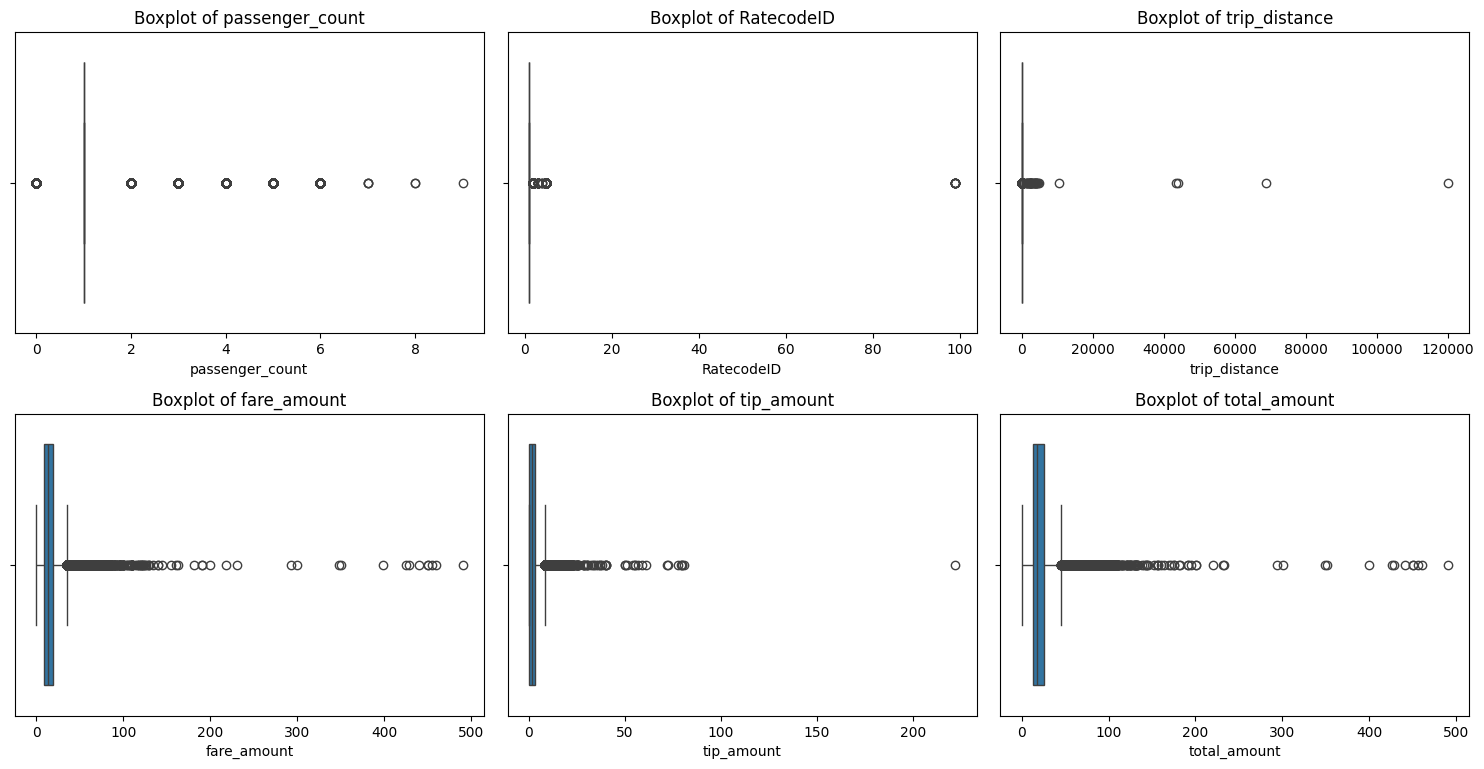

In [74]:
col_angka = ['passenger_count', 'RatecodeID', 'trip_distance', 'fare_amount', 
       'tip_amount', 'total_amount']

# Box Plot to check outliers in numerical columns
plt.figure(figsize=(15, 15))
for i, column in enumerate(col_angka, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=df[column], orient= 'h')
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
plt.tight_layout()
plt.show()

##### **4.2.1 Outliers on `passenger_count`**

As mentioned on the previous chapter, there are outliers:

- There are 333 data that have '0' passenger count.

- Refer to the regulation, the maximum number of passengers allowed in a taxi is 6 people. ([Source](https://www.nyc.gov/site/tlc/passengers/passenger-frequently-asked-questions.page))

In [75]:
# Replace the value of 0 with the mininum value, 1.
# Replace the data that more than 6 with the maximum number allowed, 6.

df["passenger_count"].replace({0:1, 7:6, 8:6, 9:6}, inplace=True)

In [76]:
# Validate the result
df["passenger_count"].value_counts().reset_index().set_index('passenger_count').sort_index()

,count
passenger_count,
1,58204
2,5014
3,936
4,358
5,1759
6,1055


##### **4.2.2 Outliers on `lpep_pickup_datetime` and `lpep_dropoff_datetime`**

In [77]:
# Checking head and tail sort_values "lpep_pickup_datetime" column
df[["lpep_pickup_datetime", "lpep_dropoff_datetime"]].sort_values(by="lpep_pickup_datetime", ascending=True)

,lpep_pickup_datetime,lpep_dropoff_datetime
17874,2009-01-01 20:21:27,2009-01-02 11:07:31
298,2022-12-09 14:10:49,2022-12-09 14:22:26
318,2022-12-09 14:55:42,2022-12-09 15:33:06
24,2023-01-01 00:01:31,2023-01-01 00:16:02
44,2023-01-01 00:04:25,2023-01-01 00:17:50
...,...,...
68210,2023-01-31 23:51:00,2023-02-01 00:07:00
63876,2023-01-31 23:53:41,2023-02-01 00:31:14
63858,2023-01-31 23:56:16,2023-02-01 00:03:16
63872,2023-01-31 23:58:23,2023-02-01 00:07:16


**Insight:**

From the sort_values results above, it is found that this dataset is taxi trip data in January 2023, but in this data there is data outside January 2023, namely: 

- `2009-01-01 `: 1 data
- `2022-12-09` : 2 data
- `2023-02-01` : 1 data. 

**Assumptions:**

Because the total number of this outlier is 4 (0.0059%) of the total data observed, this data will be dropped.

In [78]:
# Dropping the outliers in 'lpep_pickup_datetime'

index_drop_pickup = df[(pd.DatetimeIndex(df['lpep_pickup_datetime']).year == 2009) |
                       (pd.DatetimeIndex(df['lpep_pickup_datetime']).year == 2022) |
                       (pd.DatetimeIndex(df['lpep_pickup_datetime']).month == 2)].index
df.drop(index_drop_pickup , inplace=True)

##### **4.2.3 Outliers on `RatecodeID`**

In [79]:
# Checking outliers in RatecodeID
outlier_Ratecode = df[df['RatecodeID'] == 99]
display(outlier_Ratecode)
print(f'Number of outliers in RatecodeID : {len(outlier_Ratecode)}')

# Dropping "RatecodeID" == 99.0
df.drop(index=outlier_Ratecode.index, inplace=True)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,PU_Borough,PU_Zone,PU_Service_Zone,DO_Borough,DO_Zone,DO_Service_Zone
1084,1,2023-01-01 19:44:13,2023-01-01 19:58:30,99.0,150,55,1,3.3,18.2,0.0,1.5,0.0,0.0,1.0,19.7,1.0,1.0,0.0,Brooklyn,Manhattan Beach,Boro Zone,Brooklyn,Coney Island,Boro Zone
2174,1,2023-01-02 16:39:05,2023-01-02 17:31:42,99.0,73,82,1,3.7,23.5,0.0,1.5,0.0,0.0,1.0,25.0,1.0,1.0,0.0,Queens,East Flushing,Boro Zone,Queens,Elmhurst,Boro Zone
9055,1,2023-01-05 20:33:45,2023-01-05 22:46:41,99.0,14,123,1,6.2,28.2,0.0,1.5,0.0,0.0,1.0,29.7,1.0,1.0,0.0,Brooklyn,Bay Ridge,Boro Zone,Brooklyn,Homecrest,Boro Zone
14125,1,2023-01-08 11:36:41,2023-01-08 12:14:59,99.0,61,77,1,2.7,22.5,0.0,1.5,0.0,0.0,1.0,24.0,1.0,1.0,0.0,Brooklyn,Crown Heights North,Boro Zone,Brooklyn,East New York/Pennsylvania Avenue,Boro Zone
29143,1,2023-01-15 13:51:42,2023-01-15 14:37:38,99.0,108,181,1,6.5,24.2,0.0,1.5,0.0,0.0,1.0,25.7,1.0,1.0,0.0,Brooklyn,Gravesend,Boro Zone,Brooklyn,Park Slope,Boro Zone
29711,1,2023-01-15 17:52:52,2023-01-15 22:11:55,99.0,150,123,1,1.6,15.2,0.0,1.5,0.0,0.0,1.0,16.7,1.0,1.0,0.0,Brooklyn,Manhattan Beach,Boro Zone,Brooklyn,Homecrest,Boro Zone
35975,1,2023-01-19 01:07:59,2023-01-19 01:17:19,99.0,90,68,1,0.6,15.2,0.0,1.5,0.0,0.0,1.0,16.7,1.0,1.0,0.0,Manhattan,Flatiron,Yellow Zone,Manhattan,East Chelsea,Yellow Zone
42432,1,2023-01-21 20:29:58,2023-01-22 02:59:25,99.0,150,123,1,1.4,15.2,0.0,1.5,0.0,0.0,1.0,16.7,1.0,1.0,0.0,Brooklyn,Manhattan Beach,Boro Zone,Brooklyn,Homecrest,Boro Zone
45204,1,2023-01-23 13:45:11,2023-01-23 23:36:42,99.0,244,248,1,28.3,50.2,0.0,1.5,0.0,0.0,1.0,51.7,1.0,1.0,0.0,Manhattan,Washington Heights South,Boro Zone,Bronx,West Farms/Bronx River,Boro Zone


Number of outliers in RatecodeID : 9


**Insight:**

From the syntax result above, there 10 outliers that have the value of 99 in the RatecodeID column.

**Assumption:**

As the proportion of these outliers is very small, 0.015% of the data observed, we can drop these outliers.

In [80]:
# Validate the handling of RatecodeID outliers
df['RatecodeID'].value_counts().reset_index().set_index('RatecodeID')

,count
RatecodeID,
1.0,65869
5.0,1264
2.0,153
3.0,24
4.0,3


##### **4.2.4 Outliers on `trip_distance`, `fare_amount`, `tip_amount`**

To check for outliers in these three columns, new columns `trip_duration_minute` and `vehicle_speed` are created. These new columns is also used for later analysis purposes.

In [81]:
# Create a new column "trip_duration_minute" = difference between "lpep_dropoff_datetime" and "lpep_pickup_datetime"
# Create a new column "vehicle_speed" = division between "trip_distance" and "trip_duration_minute"
diff_dur = df["lpep_dropoff_datetime"] - df["lpep_pickup_datetime"]
df.insert(3, "trip_duration_minute", (diff_dur/np.timedelta64(1, 'm')).astype('float').round(2))
df.insert(4, "vehicle_speed", (df["trip_distance"] / (df["trip_duration_minute"] / 60)).round(2))
df[['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'trip_distance', 'trip_duration_minute', 'vehicle_speed']]

,lpep_pickup_datetime,lpep_dropoff_datetime,trip_distance,trip_duration_minute,vehicle_speed
0,2023-01-01 00:26:10,2023-01-01 00:37:11,2.58,11.02,14.05
1,2023-01-01 00:51:03,2023-01-01 00:57:49,1.81,6.77,16.04
2,2023-01-01 00:35:12,2023-01-01 00:41:32,0.00,6.33,0.00
3,2023-01-01 00:13:14,2023-01-01 00:19:03,1.30,5.82,13.40
4,2023-01-01 00:33:04,2023-01-01 00:39:02,1.10,5.97,11.06
...,...,...,...,...,...
68206,2023-01-31 22:29:00,2023-01-31 22:42:00,4070.82,13.00,18788.40
68207,2023-01-31 22:40:00,2023-01-31 22:48:00,2.14,8.00,16.05
68208,2023-01-31 23:46:00,2023-02-01 00:02:00,3.44,16.00,12.90
68209,2023-01-31 23:01:00,2023-01-31 23:19:00,3.03,18.00,10.10


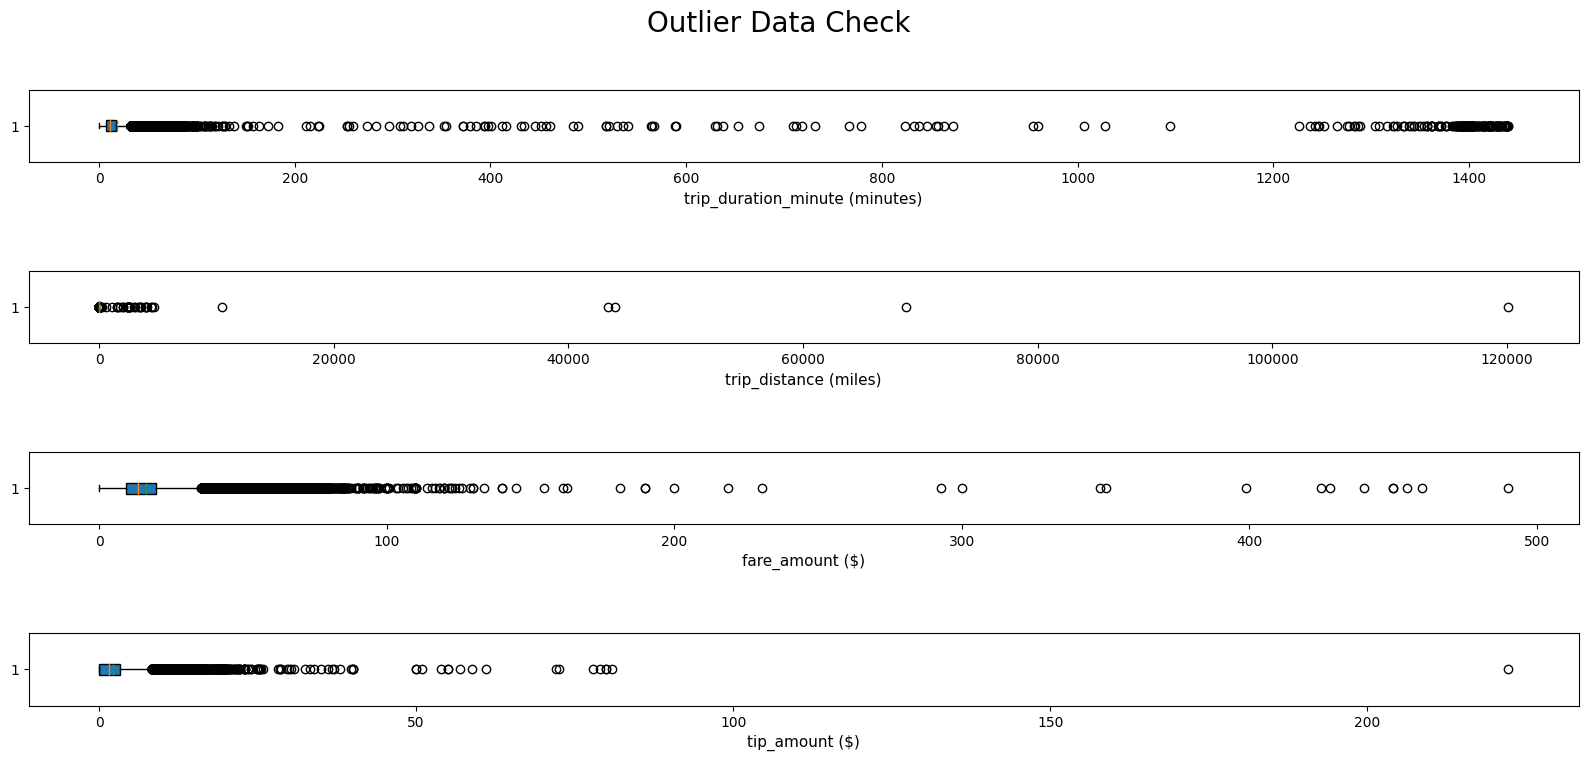

In [82]:
# Checking Data Distribution
fig, axes = plt.subplots(4, 1, figsize=(20, 8))
axes[0].boxplot(df.trip_duration_minute, patch_artist=True, meanline=True, showmeans=True, vert=False)
axes[1].boxplot(df.trip_distance, patch_artist=True, meanline=True, showmeans=True, vert=False)
axes[2].boxplot(df.fare_amount, patch_artist=True, meanline=True, showmeans=True, vert=False)
axes[3].boxplot(df.tip_amount, patch_artist=True, meanline=True, showmeans=True, vert=False)

axes[0].set_xlabel("trip_duration_minute (minutes)", fontsize=11)
axes[1].set_xlabel("trip_distance (miles)", fontsize=11)
axes[2].set_xlabel("fare_amount ($)", fontsize=11)
axes[3].set_xlabel("tip_amount ($)", fontsize=11)

fig.suptitle("Outlier Data Check", fontsize=20)
plt.subplots_adjust(left=None, bottom=None, right=None, wspace=1.5, hspace=1.5)
plt.show()

The "fare_amount" or minimum base rate for each RatecodeID is different. The following are the basic rates given: ([Source](https://www.nyc.gov/site/tlc/passengers/taxi-fare.page))

| RatecodeID | End of the Trip | Fare Amount |
| ---------- | --------------- | ----------- |
| 1 | Standard Rate | $3 |
| 2 | JFK Airport | $70 |
| 3 | Newark Airport | $23 |
| 4 | Nassau or Westchester | depends on pick up location |
| 5 | Negotiated Fare | by negotiations |

Based on the taxi fare regulation, the fare (fare_amount) will apply if the taxi has traveled 0.2 miles or the travel time is 1 minute.

For Ratecode = 4, the metered fare is double the amount from the City limit to your destination.

**Assumptions:**

1. (trip_distance must be > 0.2 mile) or (trip_duration minute must be > 1 minute) with basic fare of every Ratecode.

2. RatecodeID = 5 : The fare is negotiated between the driver and customer. So the fare_amount will not be changed.

**Insight:**

- The four columns are not normally distributed
- There are outlier data in each column
- Also pay attention to data that has a value of 0

**Assumptions:**

We can limit our data by making assumptions as follows:

- `fare_amount` is adjusted to the regulatory fare

- `tip_amount` 

    Tipping is typically left to the discretion of the passenger, and it's considered customary to tip taxi drivers for their service. The amount can vary, but it is often around 15-20% of the total fare.
  
- `trip_distance` 

    The longest possible trip within the city, you might consider a route that starts at the southern tip of Staten Island (such as Richmond County) and goes to the northernmost point of the Bronx (such as Beacon). This route would cover a significant distance across multiple boroughs, where these two points are around 50 miles away.

- `trip_duration_minute` 
    Whilst, the longest possible duration within the city, for instance these two points, will take around 1.5 hours using tolls. But, if we assume the taxi trips via roads other than highway and possibly traffics in it, the duration could be double. So, we set the upper limit for the trip duration is 3 hours.


##### Column of `fare_amount`

In [83]:
# Check whether there is a (trip_distance below 0.2miles or a trip_duration_minute below 60s) with a price above the fare_amount for each RateodeID

df[(((df.trip_duration_minute <= 1) | (df.trip_distance <= 0.2)) & (df.RatecodeID == 1) & (df.fare_amount < 3)) |
   (((df.trip_duration_minute <= 1) | (df.trip_distance <= 0.2)) & (df.RatecodeID == 2) & (df.fare_amount < 70)) |
   (((df.trip_duration_minute <= 1) | (df.trip_distance <= 0.2)) & (df.RatecodeID == 3) & (df.fare_amount < 23))]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,trip_duration_minute,vehicle_speed,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,PU_Borough,PU_Zone,PU_Service_Zone,DO_Borough,DO_Zone,DO_Service_Zone
1594,1,2023-01-02 11:53:07,2023-01-02 11:53:13,0.10,0.0,1.0,152,152,1,0.00,2.5,0.0,1.5,0.0,0.0,1.0,4.0,3.0,1.0,0.0,Manhattan,Manhattanville,Boro Zone,Manhattan,Manhattanville,Boro Zone
2130,2,2023-01-02 15:46:00,2023-01-03 15:45:15,1439.25,0.0,1.0,193,193,1,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,Queens,Queensbridge/Ravenswood,Boro Zone,Queens,Queensbridge/Ravenswood,Boro Zone
2598,2,2023-01-02 20:51:09,2023-01-02 20:51:24,0.25,14.4,1.0,189,189,1,0.06,2.5,0.5,0.5,0.0,0.0,0.3,3.8,2.0,1.0,0.0,Brooklyn,Prospect Heights,Boro Zone,Brooklyn,Prospect Heights,Boro Zone
2839,1,2023-01-03 06:12:51,2023-01-03 06:12:57,0.10,0.0,1.0,75,75,1,0.00,2.5,0.0,1.5,0.0,0.0,1.0,4.0,3.0,1.0,0.0,Manhattan,East Harlem South,Boro Zone,Manhattan,East Harlem South,Boro Zone
3439,1,2023-01-03 12:27:38,2023-01-03 12:27:49,0.18,0.0,1.0,145,145,1,0.00,2.5,0.0,1.5,0.0,0.0,1.0,4.0,2.0,1.0,0.0,Queens,Long Island City/Hunters Point,Boro Zone,Queens,Long Island City/Hunters Point,Boro Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60098,2,2023-01-30 09:17:49,2023-01-30 09:19:09,1.33,0.0,1.0,207,207,1,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,Queens,Saint Michaels Cemetery/Woodside,Boro Zone,Queens,Saint Michaels Cemetery/Woodside,Boro Zone
61178,2,2023-01-30 17:44:24,2023-01-30 17:45:18,0.90,0.0,1.0,193,193,1,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,Queens,Queensbridge/Ravenswood,Boro Zone,Queens,Queensbridge/Ravenswood,Boro Zone
61608,2,2023-01-30 21:37:11,2023-01-30 21:37:47,0.60,0.0,1.0,97,97,1,0.00,2.5,0.5,0.5,0.0,0.0,0.3,3.8,2.0,1.0,0.0,Brooklyn,Fort Greene,Boro Zone,Brooklyn,Fort Greene,Boro Zone
61980,1,2023-01-31 08:50:05,2023-01-31 08:56:23,6.30,0.0,1.0,71,85,1,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,Brooklyn,East Flatbush/Farragut,Boro Zone,Brooklyn,Erasmus,Boro Zone


As the result above, there are 116 data with inappropriate fare_amount values. Then, we can replace it with the right one.

In [84]:
# Replacing the appropriate fare_amount value
df.fare_amount = np.where(((df.trip_duration_minute <= 1) | (df.trip_distance <= 0.2)) & ((df.RatecodeID == 1) & (df.fare_amount < 3)), 3,\
                           np.where(((df.trip_duration_minute <= 1) | (df.trip_distance <= 0.2)) & ((df.RatecodeID == 2) & (df.fare_amount < 70)), 70,\
                                     np.where(((df.trip_duration_minute <= 1) | (df.trip_distance <= 0.2)) & ((df.RatecodeID == 3) & (df.fare_amount < 23)), 23, df.fare_amount)))

In [85]:
# Sedangkan untuk RatecodeID == 4, perlu di cek pick up locationnya
df[df['RatecodeID'] == 4][['RatecodeID', 'PU_Zone', 'fare_amount']] 

,RatecodeID,PU_Zone,fare_amount
12426,4.0,Central Harlem,3.5
46141,4.0,Central Park,162.6
49606,4.0,Central Harlem,3.7


Based on result above, for RatecodeID == 4, the pick up location is not at JFK Airport or Newark Airport and the fare_amount value is not less than $3. With this, the data still makes sense.

##### Column of `trip_duration_minute`

With the previous assumptions, RatecodeID == 1 or 2 or 3 which means that taxi trips within the city, the maximum duration is 3 hours.

In [86]:
outlier1 = df[(df['trip_duration_minute'] > 600) & ((df['RatecodeID'] == 1) | (df['RatecodeID'] == 2) |(df['RatecodeID'] == 3))].index

print(f'The number of data beyond the duration limit: {len(outlier1)}')

The number of data beyond the duration limit: 198


In [87]:
# Dropping the outlier that beyond the duration limit
df.drop(index=outlier1, inplace=True)

##### Column of `trip_distance`

The destination can be beyond NYC limit with conditions:

1. RatecodeID == 4 : taxi headed to Westchester & Nassau Counties.

2. RatecodeID == 5 : other points outside the city.

With the previous assumption, taxi travel's upper limit distance inside the city is 50 miles.

In [88]:
df['trip_distance'].describe()

count     67115.000000
mean          8.182803
std         589.863094
min           0.000000
25%           1.130000
50%           1.860000
75%           3.210000
max      120098.840000
Name: trip_distance, dtype: float64

In [89]:
# Check if taxi trips beyond the distance limit
outlier_distance = df[((df['RatecodeID'] != 4) | (df['RatecodeID'] != 5)) & (df['trip_distance'] > 50)]
print(f'The number of data beyond the distance limit: {len(outlier_distance)}')
display(outlier_distance)

# Dropping the outliers
df.drop(index=outlier_distance.index, inplace=True)

The number of data beyond the distance limit: 38


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,trip_duration_minute,vehicle_speed,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,PU_Borough,PU_Zone,PU_Service_Zone,DO_Borough,DO_Zone,DO_Service_Zone
7322,2,2023-01-05 09:00:03,2023-01-05 15:18:38,378.58,10.49,5.0,134,134,1,66.18,15.00,0.0,0.0,0.00,0.00,1.0,18.75,2.0,1.0,2.75,Queens,Kew Gardens,Boro Zone,Queens,Kew Gardens,Boro Zone
33373,2,2023-01-17 18:40:38,2023-01-17 19:04:45,24.12,3910.37,5.0,82,236,1,1571.97,29.97,0.0,0.0,3.04,6.55,1.0,43.31,1.0,1.0,2.75,Queens,Elmhurst,Boro Zone,Manhattan,Upper East Side North,Yellow Zone
63995,2,2023-01-01 12:35:00,2023-01-01 12:58:00,23.00,1512.08,1.0,181,137,1,579.63,28.49,0.0,0.0,4.84,0.00,1.0,37.08,5.0,1.0,2.75,Brooklyn,Park Slope,Boro Zone,Manhattan,Kips Bay,Yellow Zone
64446,2,2023-01-05 08:39:00,2023-01-05 08:58:00,19.00,8069.91,1.0,193,140,1,2555.47,23.68,0.0,0.0,0.49,0.00,1.0,27.92,5.0,1.0,2.75,Queens,Queensbridge/Ravenswood,Boro Zone,Manhattan,Lenox Hill East,Yellow Zone
64558,2,2023-01-05 17:21:00,2023-01-05 17:26:00,5.00,36934.68,1.0,49,65,1,3077.89,12.02,0.0,0.0,4.00,0.00,1.0,17.02,5.0,1.0,0.00,Brooklyn,Clinton Hill,Boro Zone,Brooklyn,Downtown Brooklyn/MetroTech,Boro Zone
64572,2,2023-01-05 18:07:00,2023-01-05 18:13:00,6.00,26065.20,1.0,193,193,1,2606.52,11.00,0.0,0.0,1.20,0.00,1.0,13.20,5.0,1.0,0.00,Queens,Queensbridge/Ravenswood,Boro Zone,Queens,Queensbridge/Ravenswood,Boro Zone
64609,2,2023-01-06 07:27:00,2023-01-06 07:30:00,3.00,867842.40,1.0,41,74,1,43392.12,12.02,0.0,0.0,2.60,0.00,1.0,15.62,5.0,1.0,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,East Harlem North,Boro Zone
64695,2,2023-01-06 14:16:00,2023-01-06 14:59:00,43.00,192.49,1.0,82,130,1,137.95,44.90,0.0,0.0,4.04,0.00,1.0,49.94,5.0,1.0,0.00,Queens,Elmhurst,Boro Zone,Queens,Jamaica,Boro Zone
64947,2,2023-01-08 23:47:00,2023-01-08 23:59:00,12.00,12232.65,1.0,52,79,1,2446.53,23.89,0.0,0.0,4.34,0.00,1.0,31.98,5.0,1.0,2.75,Brooklyn,Cobble Hill,Boro Zone,Manhattan,East Village,Yellow Zone
64954,2,2023-01-09 04:28:00,2023-01-09 04:46:00,18.00,6757.70,1.0,119,20,1,2027.31,20.64,0.0,0.0,1.00,0.00,1.0,22.64,5.0,1.0,0.00,Bronx,Highbridge,Boro Zone,Bronx,Belmont,Boro Zone


In [90]:
# Check if taxi trips less than 0.2 mile and its duration less than one minute
outlier_distance2 = df[(df.trip_distance<0.2) & (df.trip_duration_minute<1)].index
print(f'The number of data beyond the distance limit: {len(outlier_distance2)}')

# Dropping outliers
df.drop(index=outlier_distance2, inplace=True)

The number of data beyond the distance limit: 1094


##### Column of `vehicle_speed`

Refer on the regulation, the taxi speed limit : 25 mph ([Source](https://www.nyc.gov/assets/tlc/downloads/pdf/driver_education_study_guide.pdf))

Whereas in reality it is possible for taxis to speed beyond that limit.

**Assumption:**

1. Taxis may be driving on the highway so that the speed exceeds the limit

2. The NY Post reveals that taxi speeds are 30 to 40 miles per hour higher than the speed limit. ([Source](https://gothamist.com/news/speeding-nyc-taxis))

3. We assume the upper limit of taxi speed is 40 mph

In [91]:
# Check if taxi speeds exeed 40 mph
outlier_speed = df[(df['vehicle_speed'] > 40)].index
print(f'The number of data beyond the limit: {len(outlier_speed)}')

# Dropping rows with no transactions
df.drop(index=outlier_speed, inplace=True)

The number of data beyond the limit: 185


In [92]:
# Check if data has no transaction (total_amount == 0)
outlier_transaction = df[(df['trip_distance'] == 0) & (df['total_amount'] == 0)].index
print(f'The number of data beyond the distance limit: {len(outlier_transaction)}')

# Dropping rows with no transactions
df.drop(index=outlier_transaction, inplace=True)


The number of data beyond the distance limit: 16


In [93]:
df[df['total_amount'] == 0]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,trip_duration_minute,vehicle_speed,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,PU_Borough,PU_Zone,PU_Service_Zone,DO_Borough,DO_Zone,DO_Service_Zone
44826,1,2023-01-23 10:38:28,2023-01-23 10:57:41,19.22,10.30,5.0,129,223,2,3.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,Queens,Jackson Heights,Boro Zone,Queens,Steinway,Boro Zone
45261,1,2023-01-23 13:27:55,2023-01-23 14:35:24,67.48,16.18,5.0,56,260,1,18.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,Queens,Corona,Boro Zone,Queens,Woodside,Boro Zone
47269,1,2023-01-24 11:01:43,2023-01-24 11:14:46,13.05,10.11,5.0,42,69,1,2.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,Manhattan,Central Harlem North,Boro Zone,Bronx,East Concourse/Concourse Village,Boro Zone
53188,1,2023-01-26 18:29:07,2023-01-26 19:35:46,66.65,12.06,5.0,93,10,2,13.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,Queens,Flushing Meadows-Corona Park,Boro Zone,Queens,Baisley Park,Boro Zone
53542,1,2023-01-26 20:35:35,2023-01-26 21:44:25,68.83,18.13,5.0,10,10,1,20.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,Queens,Baisley Park,Boro Zone,Queens,Baisley Park,Boro Zone
60315,1,2023-01-30 11:01:25,2023-01-30 11:04:06,2.68,6.72,5.0,244,244,1,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,Manhattan,Washington Heights South,Boro Zone,Manhattan,Washington Heights South,Boro Zone


##### Column of `tip_amount`

Jika diliat pada box plot untuk kolom tip_amount, kita bisa lihat bahwa ada satu data pada kolom tersebut yang menjadi outlier.

In [94]:
# Check the outlier in tip_amount
tip_out = df['tip_amount'].max()
tip_outindex = df['tip_amount'].idxmax()

print(f'Outlier in tip_amount : {tip_out}')
print(f'Index Outlier : {tip_outindex}') 

# Dropping the outlier
df.drop(index=tip_outindex, inplace=True)

Outlier in tip_amount : 222.22
Index Outlier : 50588


In [95]:
len(df)

65781

#### **5. Summary of Data Cleaning**

The data cleaning process has been carried out by doing:

1. Handling the missing/Null values
    
    - Dropping unrelevant and unuseful columns (`ehail_fee` and `store_and_fwd_flag`) to the analysis

    - Filling the missing values 

2. Adjusting the data types

    - Changing the `lpep_pickup_datetime` and `lpep_dropoff_datetime` data type to the datetime type

    - Changing `passenger_count` data type to integer type

3. Handling the outliers

    - Dropping the negative data, which is the duplicate of the positive data, by seeing the recorded data in date and location columns.

    - Dropping 3 rows contained negative values in mta_tax, improvement_surcharge, and total_amount column.

    - Limiting data to Janury 2023 only for analysis.
    
    - Handling outliers in `passenger_count`, `RatecodeID`, `trip_distance`, `fare_amount`, `trip_duration_minute`, `vehicle_speed`, `tip_amount` by referring to the regulatioins.

Note : All the assumptions for the data cleaning process refers to NYC government regulations and conditions.

The results of the data cleaning process left **65781** data by cutting **3.56%** from the initial data.

In [96]:
listItem = []
for col in df.columns :
    n_unique = df[col].nunique()
    unique_sample = list(df[col].drop_duplicates().sample(min(2, n_unique), replace=False).values)
    listItem.append([col, df[col].dtype, df[col].isna().sum(), n_unique, unique_sample]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print("DataFrame shape:", df.shape)
dfDesc

DataFrame shape: (65781, 26)


,dataFeatures,dataType,null,unique,uniqueSample
0,VendorID,int64,0,2,"[2, 1]"
1,lpep_pickup_datetime,datetime64[ns],0,64405,"[2023-01-06T17:18:16.000000000, 2023-01-12T17:..."
2,lpep_dropoff_datetime,datetime64[ns],0,64361,"[2023-01-08T21:07:19.000000000, 2023-01-02T13:..."
3,trip_duration_minute,float64,0,3358,"[37.85, 30.53]"
4,vehicle_speed,float64,0,3312,"[0.26, 10.0]"
5,RatecodeID,float64,0,5,"[5.0, 2.0]"
6,PULocationID,int64,0,220,"[91, 146]"
7,DOLocationID,int64,0,247,"[34, 49]"
8,passenger_count,int64,0,6,"[3, 4]"
9,trip_distance,float64,0,1731,"[3.21, 4.71]"


<Axes: >

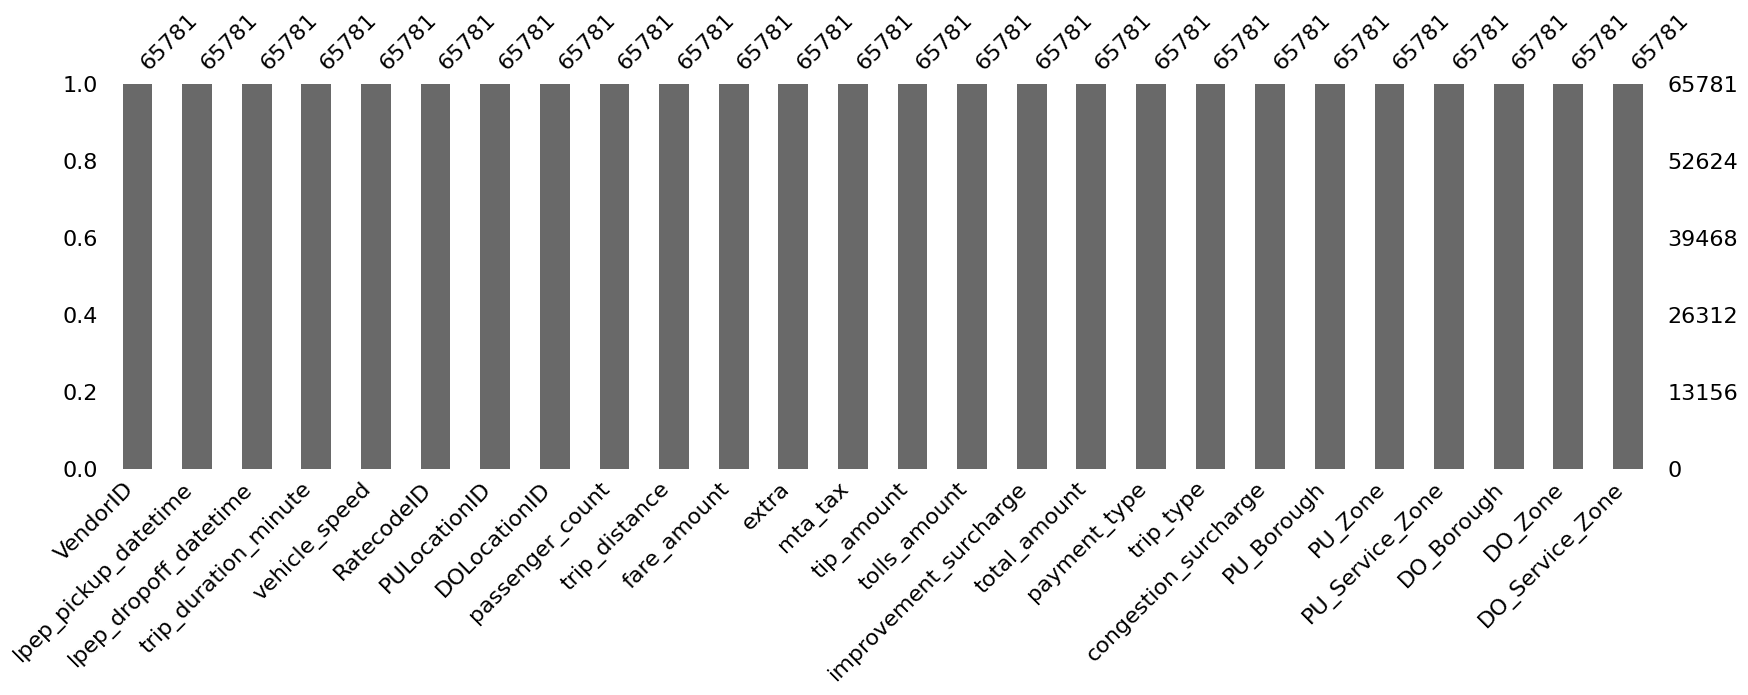

In [97]:
msno.bar(df,figsize=(20,5))

In [98]:
df.to_csv('TLC_cleaned.csv', index=False)

## **Data Analysis**

Exploratory Questions:

1. Demand Variability:

    - Pick-up Zone and Preferences:

        - Which areas exhibit the highest demand for taxi services?

        - Are there specific pick-up zones preferred by users?

    - Pick-up Time:

        - What are the peak hours of demand for taxi services?

        - How does demand fluctuate during different times of the day?


2. Revenue by Travel Zones and Routes:

    - Travel Zones:

        - What are the revenue trends across different travel zones?

        - Are there particular zones that contribute significantly to overall revenue?
    
    - Routes:

        - Which routes are most profitable for the company?


3. Tipping Patterns:

        - How is the tipping patterns by time (by Day and Hour) within a week?

### **1. Demand Variability**

The preliminary analysis carried out is to look for demand trends to answer the questions below:

- **Which areas exhibit the highest demand for taxi services?**

- **Are there specific pick-up zones preferred by users?**

- **What are the peak hours of demand for taxi services?**

- **How does demand fluctuate during different times of the day?**


#### **Highest Taxi Demand by Borough**

In [99]:
busiestborough = df.groupby('PU_Borough')[['lpep_pickup_datetime']].count().reset_index().rename(columns= {'lpep_pickup_datetime' : 'Count'}).sort_values(by= 'Count', ascending= False)

# Calculating number of trips 
total_trips = busiestborough['Count'].sum()

# Adding "Percentage" column
busiestborough['Percentage (%)'] = (busiestborough['Count'] / total_trips * 100).round(2)

busiestborough

,PU_Borough,Count,Percentage (%)
2,Manhattan,38780,58.95
3,Queens,16900,25.69
1,Brooklyn,8984,13.66
0,Bronx,1107,1.68
4,Staten Island,10,0.02


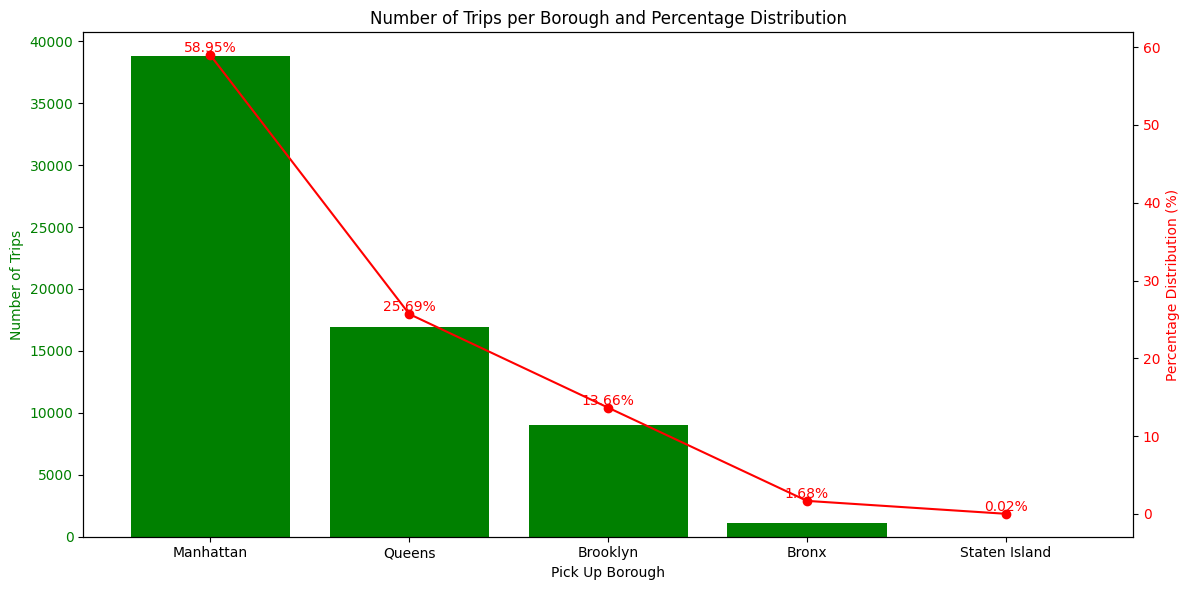

In [100]:
# Plotting the dual-axis chart
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for number of trips
ax1.bar(busiestborough['PU_Borough'], busiestborough['Count'], color='green', label='Number of Trips')
ax1.set_xlabel('Pick Up Borough')
ax1.set_ylabel('Number of Trips', color='green')
ax1.tick_params(axis='y', labelcolor='green')

# Removing grid
plt.grid(False)

# Create a second y-axis for percentage distribution
ax2 = ax1.twinx()
ax2.plot(busiestborough['PU_Borough'], busiestborough['Percentage (%)'], color='red', marker='o', label='Percentage Distribution')
ax2.set_ylabel('Percentage Distribution (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Adding data labels for percentage distribution
for i, value in enumerate(busiestborough['Percentage (%)']):
    ax2.text(i, value, f'{value}%', ha='center', va='bottom', color='red')

# Adding labels and title
plt.title('Number of Trips per Borough and Percentage Distribution')

# Removing grid
plt.grid(False)

# Display the dual-axis chart
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Insights:**

The highest demand for taxi trips occurred in the borough of **Manhattan** with 38 thousand trips, followed by **Queens** with 16 thousand trips, **Brooklyn** with 8 thousand trips, and the rest occurred in the Bronx and Staten Island with very small proportions.

**Assumptions:**

To narrow down the later analysis, we will focus on the borough of **Manhattan**, **Queens**, and **Brooklyn**.

#### **The Highest Taxi Demand by Pick Up Zone**

In [101]:
# Select the top 10 values in the 'Zone' column
top_zones = df.groupby(['PU_Zone','PU_Borough'])['VendorID'].count().reset_index().sort_values(by= 'VendorID', ascending = False).rename(columns={'VendorID':'Number of Trips'}).head(10).set_index('PU_Zone')
top_zones

,PU_Borough,Number of Trips
PU_Zone,,
East Harlem North,Manhattan,13049
East Harlem South,Manhattan,8989
Central Harlem,Manhattan,3975
Morningside Heights,Manhattan,3827
Forest Hills,Queens,3748
Central Park,Manhattan,2846
Elmhurst,Queens,2843
Fort Greene,Brooklyn,2153
Astoria,Queens,1897


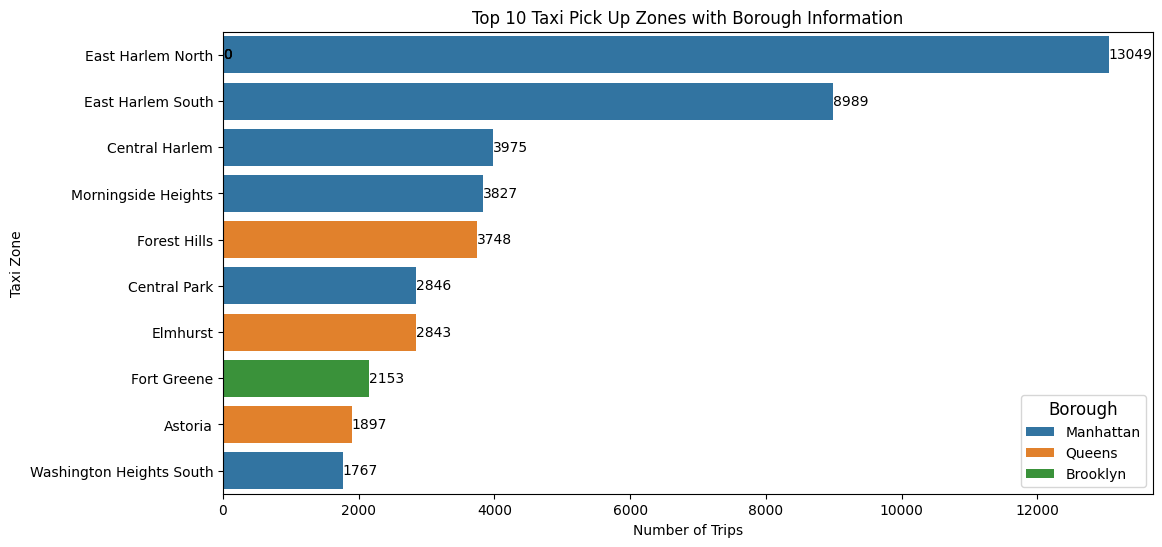

In [102]:
# Plotting the horizontal bar chart with Seaborn
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='Number of Trips', y=top_zones.index, hue='PU_Borough', data=top_zones, dodge=False)

# Adding labels and title
plt.title('Top 10 Taxi Pick Up Zones with Borough Information')
plt.xlabel('Number of Trips')
plt.ylabel('Taxi Zone')

# Add data labels to the horizontal bar chart
for p in barplot.patches:
    width = p.get_width()
    if np.isfinite(width):  # Check if width is finite
        plt.text(width, p.get_y() + p.get_height() / 2, f'{width:.0f}', ha='left', va='center')

# Display the horizontal bar chart
plt.legend(title='Borough', title_fontsize='12')
plt.show()

**Insights:**

The 10 pick up zones with the highest demand are in 3 boroughs (Manhattan, Queens, and Brooklyn).

1. **Manhattan** : 

    - East Harlem North

    - East Harlem South

    - Central Harlem

    - Morningside Heights
    
    - Central Park

    - Washington Heights South

2. **Queens** :

    - Forest Hills

    - Elmhurst	

    - Astoria

3. **Brooklyn** : 

    - Fort Greene

#### **Taxi Demand Trends by Date in NYC**

In [103]:
pickup_daily = df.groupby(df['lpep_pickup_datetime'].dt.date)['VendorID'].count().reset_index()
pickup_daily.rename(columns={'lpep_pickup_datetime': 'Date'}, inplace=True)
pickup_daily.rename(columns={'VendorID': 'Number of Trip'}, inplace=True)
display(pickup_daily)

#pickup_avg_day = pickup_daily = df.groupby(df['lpep_pickup_datetime'].dt.date)['VendorID'].count().reset_index()
#pickup_avg_day

,Date,Number of Trip
0,2023-01-01,1392
1,2023-01-02,1500
2,2023-01-03,2040
3,2023-01-04,2284
4,2023-01-05,2331
5,2023-01-06,2451
6,2023-01-07,2072
7,2023-01-08,1587
8,2023-01-09,2124
9,2023-01-10,2105


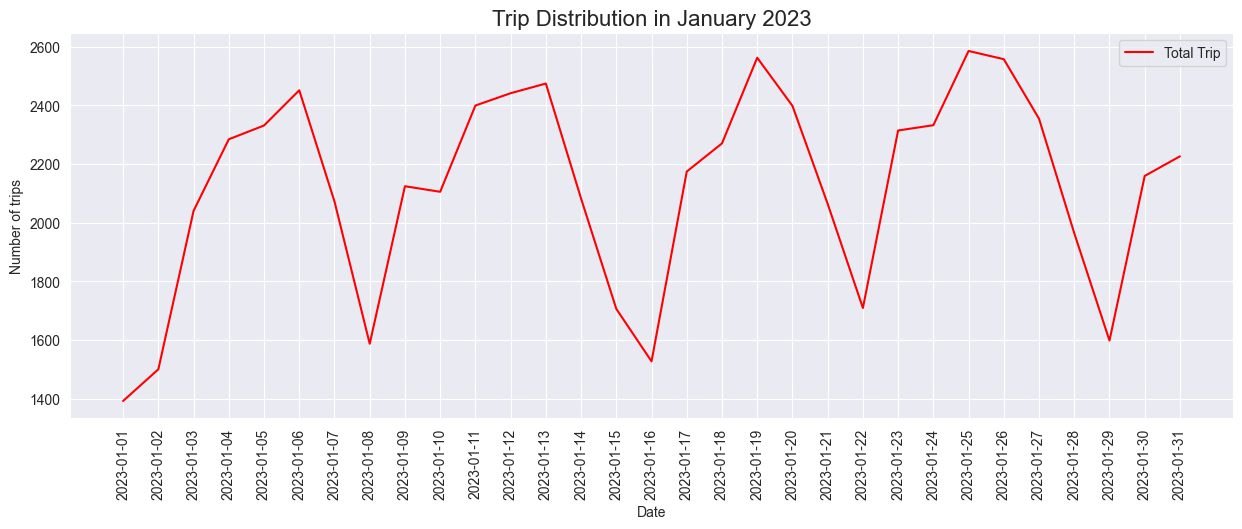

In [104]:
plt.figure(figsize=(15,5))
sns.set_style('darkgrid')

sns.lineplot(data=pickup_daily,
             x='Date', 
             y='Number of Trip', 
             color='red',
             label = 'Total Trip')

plt.title('Trip Distribution in January 2023', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Number of trips')
plt.xticks(pickup_daily['Date'], rotation=90)

plt.show()

**Insights:**

- The highest number of taxi trips occurred on **Wednesday, January 25th 2023**, whilst the lowest number of taxi trips was on **Sunday, January 1st 2023**.

- There is a **recurring pattern of fluctuations** in the number of trips in January.

#### **Taxi Demand Trends by Day in NYC**

In [105]:
pickup_date = df[['VendorID','lpep_pickup_datetime']].groupby('lpep_pickup_datetime').count().sort_values('VendorID', ascending=False).reset_index()

# Adding a 'day_of_week' column containing the name of the day
pickup_date['day_of_week'] = pickup_date['lpep_pickup_datetime'].dt.day_name()

perdate = pickup_date[['VendorID', 'day_of_week']].groupby('day_of_week').count()
perdate.rename(columns={'VendorID':'Customer'}, inplace=True)

# Define the desired order of days of the week
desired_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Reindex the perdate DataFrame based on the desired order
perdate = perdate.reindex(desired_order).reset_index()

perdate

,day_of_week,Customer
0,Sunday,7863
1,Monday,9436
2,Tuesday,10652
3,Wednesday,9327
4,Thursday,9659
5,Friday,9442
6,Saturday,8026


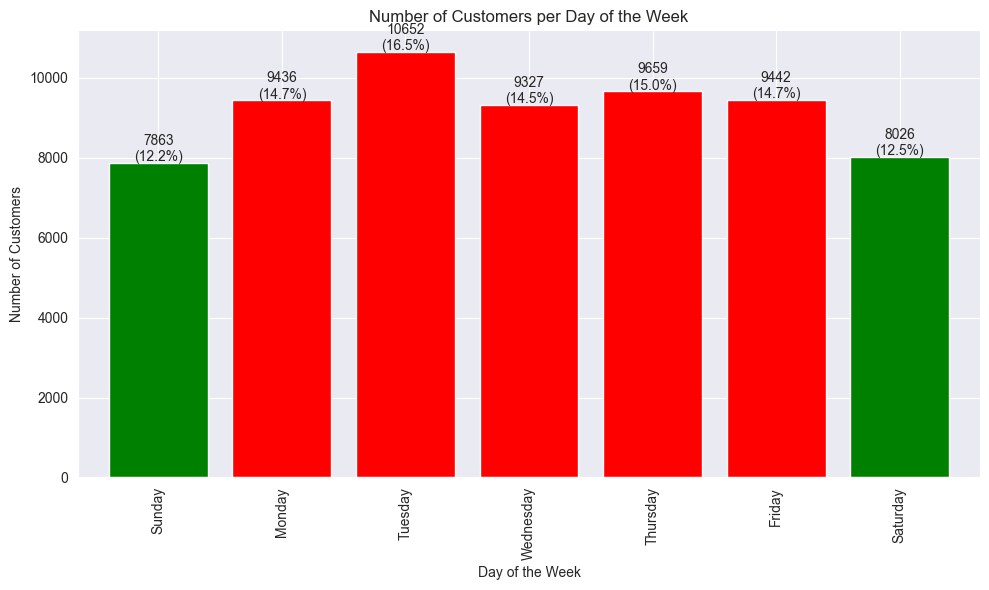

In [106]:
# Assigning colors for each day
colors = ['green' if day in ['Saturday', 'Sunday'] else 'red' for day in perdate['day_of_week']]

# Creating a bar chart
ax = perdate.plot(kind='bar', x='day_of_week', y='Customer', color=colors, figsize=(10, 6), width=0.8, legend=False)

# Adding data labels and percentages on each bar
total_customers = perdate['Customer'].sum()
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total_customers) * 100
    ax.annotate(f'{height}\n({percentage:.1f}%)', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Adding labels and title
plt.title('Number of Customers per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Customers')

# Adjusting layout for better display
plt.tight_layout()

# Displaying the plot
plt.show()

**Insights:**

- The highest proportion of total trips occurred on **Tuesdays** at 16.5% throughout January 2023.

- Taxi demands tend to occur more on **weekdays** compared to **weekends**.

#### **Taxi Demand Trends by Hour in NYC**

In [107]:
pickup_time = df[['VendorID','lpep_pickup_datetime']].groupby('lpep_pickup_datetime').count().sort_values('VendorID', ascending=False).reset_index()
pickup_time['pickup_hour'] = pickup_time['lpep_pickup_datetime'].dt.hour

# Filter pickup_time for weekdays
weekdays = pickup_time[pickup_time['lpep_pickup_datetime'].dt.dayofweek < 6]

# Create perhour DataFrame for weekdays
perhour_weekdays = weekdays[['VendorID', 'pickup_hour']].groupby('pickup_hour').count().sort_values('pickup_hour')
perhour_weekdays.rename(columns={'VendorID': 'Customer'}, inplace=True)

# Display the pickup_time DataFrame and perhour_weekdays DataFrame
perhour_weekdays


,Customer
pickup_hour,
0,769
1,542
2,352
3,324
4,253
5,317
6,883
7,2408
8,2910


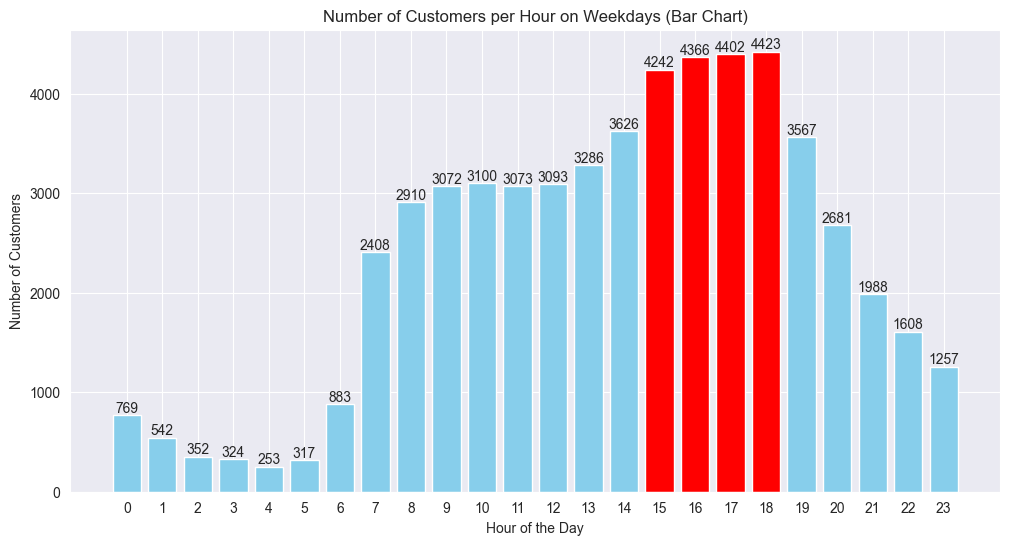

In [108]:
# Plotting the bar chart
plt.figure(figsize=(12, 6))

# Change color to 'orange' for bars between 15 and 18 hours
colors = ['red' if 15 <= hour <= 18 else 'skyblue' for hour in perhour_weekdays.index]

plt.bar(perhour_weekdays.index, perhour_weekdays['Customer'], color=colors)

# Adding data labels
for i, txt in enumerate(perhour_weekdays['Customer']):
    plt.annotate(txt, (perhour_weekdays.index[i], txt), ha='center', va='bottom')

# Adding labels and title
plt.title('Number of Customers per Hour on Weekdays (Bar Chart)')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Customers')

# Customize x-axis ticks to show every hour
plt.xticks(range(24))

# Display the bar chart
plt.show()

**Insights:**

- During weekdays, the highest demand for taxi services is observed in the afternoon, particularly from 3 pm to 6 pm. This timeframe is indicative of the post-work hours.

- Conversely, the least active period for taxi requests falls in the early morning, specifically between 12 am and 5 am

#### **Taxi Demands by Day and Hour Relationship**

In [109]:
day_order = 'Sunday Monday Tuesday Wednesday Thursday Friday Saturday'.split()
cross = pd.crosstab(index=df['lpep_pickup_datetime'].dt.day_name(), columns=df['lpep_pickup_datetime'].dt.hour, margins=True).reindex(day_order)
cross.columns.name = 'Hour of Day'
cross.index.name = 'Day of Week'

melted_cross = cross.iloc[:,:-1].reset_index().melt(id_vars='Day of Week', var_name='hour', value_name='trips')
cross

Hour of Day,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,All
Day of Week,,,,,,,,,,,,,,,,,,,,,,,,,
Sunday,301,292,237,202,148,77,67,109,134,240,347,444,509,519,539,590,581,540,543,469,408,311,208,177,7992
Monday,121,77,54,73,54,60,141,399,459,534,535,552,575,621,630,756,759,757,755,594,401,327,233,157,9624
Tuesday,92,54,46,40,23,61,201,573,708,696,625,581,623,606,709,785,848,828,840,670,495,344,259,170,10877
Wednesday,91,69,32,28,19,48,178,442,559,561,558,508,487,533,577,717,760,804,777,651,449,298,230,162,9538
Thursday,99,67,47,31,36,54,171,461,560,591,557,549,512,543,641,709,751,821,839,596,478,337,255,186,9891
Friday,147,87,43,37,31,49,148,463,495,507,511,492,464,497,660,756,743,766,765,617,451,359,320,269,9677
Saturday,226,190,132,115,90,48,50,124,204,270,390,470,495,552,497,634,614,547,569,509,456,346,328,326,8182


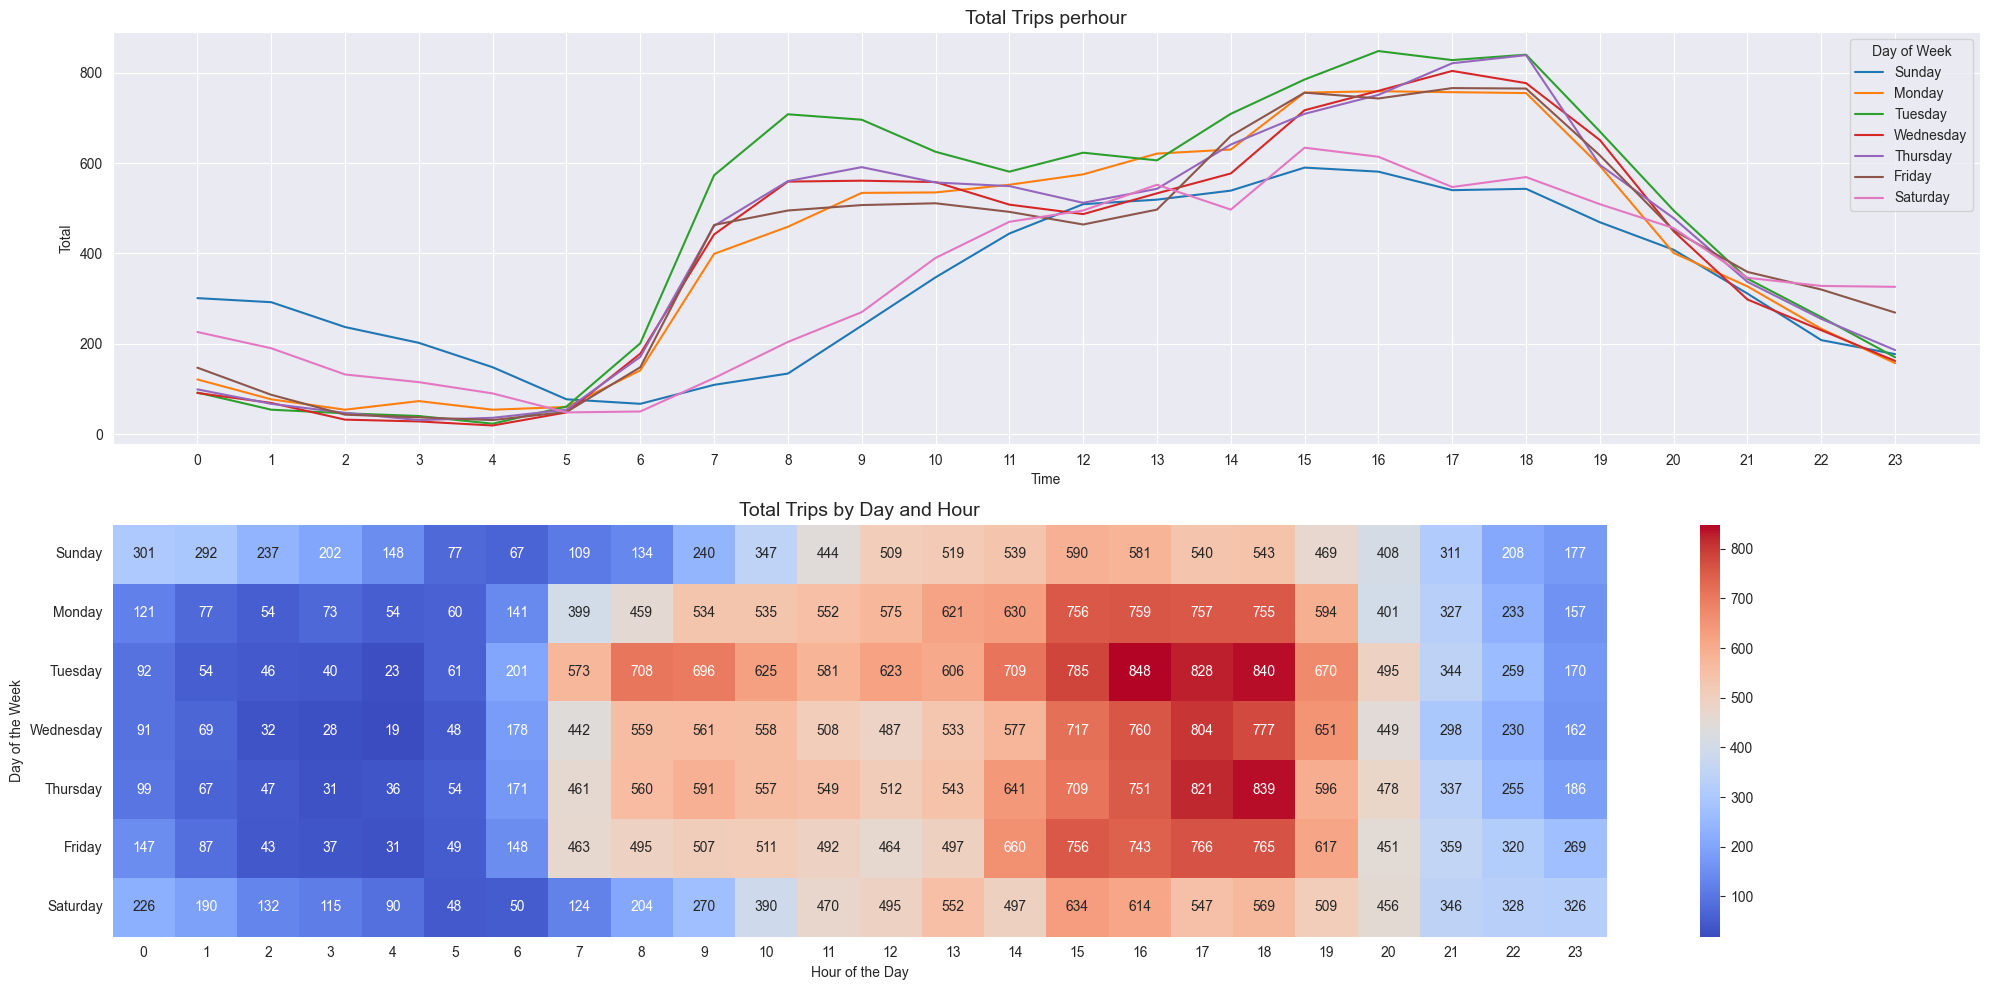

In [110]:
plt.figure(figsize=(20,10))

plt.subplot(2, 1, 1)
sns.lineplot(data=melted_cross, 
             x='hour', 
             y='trips', 
             hue='Day of Week')

plt.title('Total Trips perhour', fontsize=14)
plt.xlabel('Time')
plt.xticks(np.arange(0,24,1))
plt.ylabel('Total')

plt.subplot(2, 1, 2)
sns.heatmap(cross.iloc[:,:-1], cmap="coolwarm", annot=True, fmt='d')
plt.title('Total Trips by Day and Hour', fontsize=14)
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')

plt.tight_layout()
plt.show()

**Insights:**

- The analysis reveals a consistent rise in the volume of taxi requests during the **morning hours** (5 am to 8 am) and the **afternoon hours** (2 pm to 6 pm) across the days.

- The highest demand for taxi services is typically observed on **Tuesday**, **Wednesday**, and **Thursday**, particularly during **post-work hours** (4 pm to 6 pm).

### **2. Revenue by Travel Zones and Routes**

The subsequent analysis aims to address the primary objective of our investigation, which pertains to income assessment. It is crucial to recognize that the revenue generated varies across distinct zones or routes. Hence, we need to address the following inquiries:

**What are the revenue and tip trends across different travel zones?**

**Are there particular zones that contribute significantly to overall revenue?**

#### **Total Tip and Revenue by Day**

In [111]:
total_revenue2 = df.groupby(df['lpep_pickup_datetime'].dt.day_name())[['total_amount']].sum().reset_index().rename(columns= {'lpep_pickup_datetime':'Day','total_amount' : 'Total Revenue'}).sort_values(by= 'Total Revenue', ascending= False).set_index('Day')
total_revenue2['Total Tip'] = df.groupby(df['lpep_pickup_datetime'].dt.day_name())[['tip_amount']].sum()
# Calculating Tipping Rate per borough
total_revenue2['Tipping Rate'] = ((total_revenue2['Total Tip'] / total_revenue2['Total Revenue']) * 100).round(2)

# Define the desired order of days of the week
desired_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

total_revenue2 = total_revenue2.reindex(desired_order)
total_revenue2


,Total Revenue,Total Tip,Tipping Rate
Day,,,
Sunday,171054.97,17962.63,10.50
Monday,206299.77,20301.68,9.84
Tuesday,236814.27,22881.30,9.66
Wednesday,206405.41,20429.80,9.90
Thursday,218582.71,21615.89,9.89
Friday,210909.25,20473.15,9.71
Saturday,175265.41,17843.31,10.18


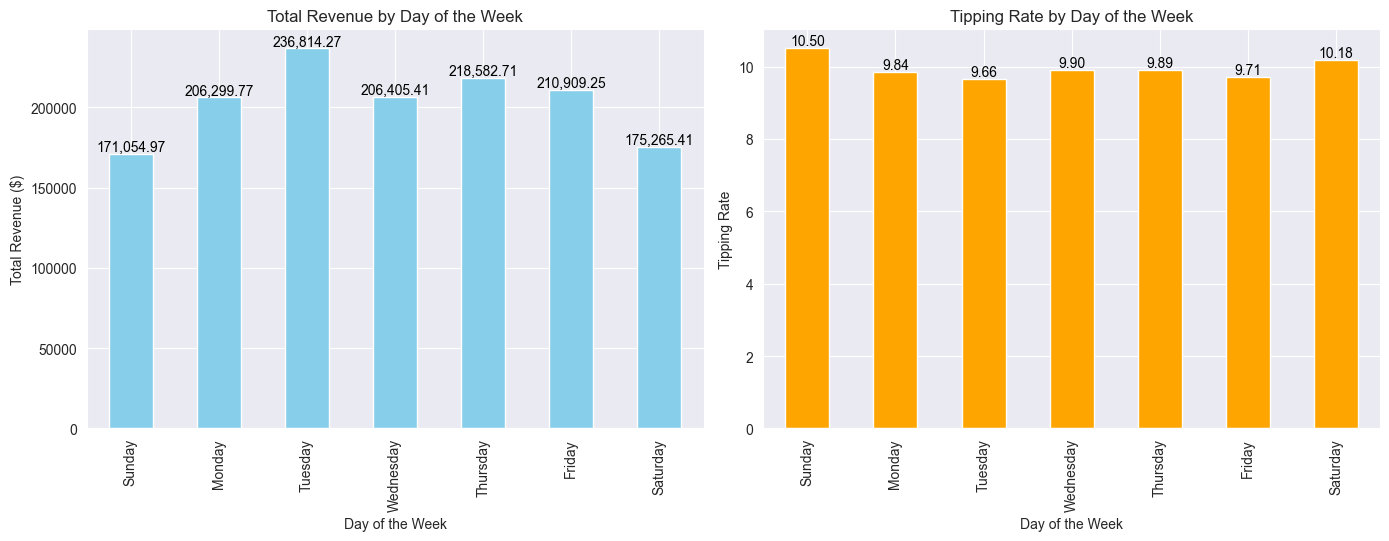

In [112]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot Total Revenue with data labels
total_revenue2.plot(kind='bar', y='Total Revenue', color='skyblue', ax=axes[0], legend=False)
axes[0].set_title('Total Revenue by Day of the Week')
axes[0].set_xlabel('Day of the Week')
axes[0].set_ylabel('Total Revenue ($)')

for p, label in zip(axes[0].patches, total_revenue2['Total Revenue']):
    height = p.get_height()
    axes[0].text(p.get_x() + p.get_width() / 2., height, f'{label:,.2f}', ha='center', va='bottom', fontsize=10, color='black')

# Plot Total Tip with data labels
total_revenue2.plot(kind='bar', y='Tipping Rate', color='orange', ax=axes[1], legend=False)
axes[1].set_title('Tipping Rate by Day of the Week')
axes[1].set_xlabel('Day of the Week')
axes[1].set_ylabel('Tipping Rate')

for p, label in zip(axes[1].patches, total_revenue2['Tipping Rate']):
    height = p.get_height()
    axes[1].text(p.get_x() + p.get_width() / 2., height, f'{label:,.2f}', ha='center', va='bottom', fontsize=10, color='black')

# Adjusting layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Display the plot
plt.show()

**Insights:**

- The analysis indicates that the ratio of total revenue to tipping is higher on weekdays compared to weekends.

- Hal yang menarik disini adalah pemberian tip pada weekend lebih tinggi dibanding pada saat weekdays

#### **Total Tip and Revenue by Borough**

In [113]:
total_revenue = df.groupby('PU_Borough')[['total_amount']].sum().reset_index().rename(columns= {'total_amount' : 'Total Revenue'}).sort_values(by= 'Total Revenue', ascending= False).set_index('PU_Borough').head(3)
total_revenue['Total Tip'] = df.groupby('PU_Borough')[['tip_amount']].sum()

# Menghitung Tipping Rate per borough
total_revenue['Tipping Rate'] = ((total_revenue['Total Tip'] / total_revenue['Total Revenue']) * 100).round(2)

display(total_revenue)


,Total Revenue,Total Tip,Tipping Rate
PU_Borough,,,
Manhattan,798996.32,88589.81,11.09
Queens,362908.12,26759.37,7.37
Brooklyn,235348.21,25341.80,10.77


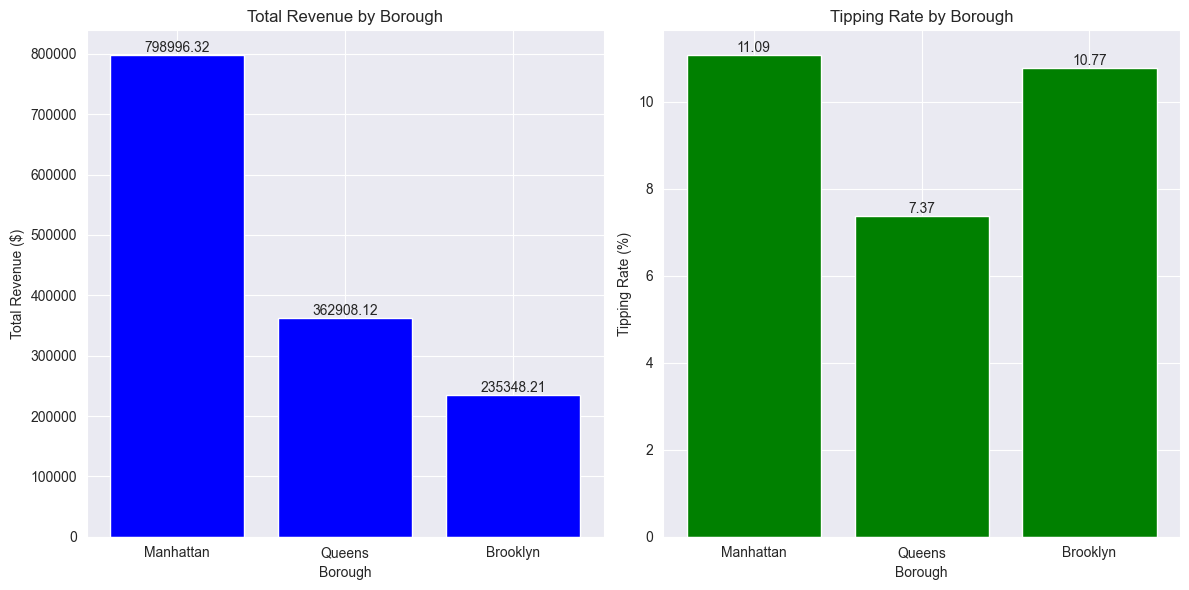

In [114]:
# Create subplot with two axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Bar Chart for Total Revenue
bars1 = axes[0].bar(total_revenue.index, total_revenue['Total Revenue'], color='blue')
axes[0].set_title('Total Revenue by Borough')
axes[0].set_xlabel('Borough')
axes[0].set_ylabel('Total Revenue ($)')

# Adding Data Labels for Total Revenue
for bar in bars1:
    yval = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Bar Chart for Tipping Rate
bars2 = axes[1].bar(total_revenue.index, total_revenue['Tipping Rate'], color='green')
axes[1].set_title('Tipping Rate by Borough')
axes[1].set_xlabel('Borough')
axes[1].set_ylabel('Tipping Rate (%)')

# Adding Data Labels for Tipping Rate
for bar in bars2:
    yval = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Display the chart
plt.tight_layout()
plt.show()

**Insights:**

In the Borough breakdown, Manhattan takes the lead in both total revenue and tips, totaling $798k and $88k, respectively. Queens and Brooklyn, though following, significantly contribute to the overall income. This highlights the diverse financial dynamics across regions, presenting opportunities for targeted growth in Queens and Brooklyn. Strategic understanding of user preferences in each Borough is crucial for optimizing service development and marketing strategies.

#### **Total Revenue by Route**

In [115]:
# Top 5 Highest Revenue by Route per Borough

## Manhattan
top_route_Manhattan = df[df['PU_Borough'] == 'Manhattan'].groupby(['PU_Zone','PU_Borough','DO_Zone','DO_Borough']).agg({'VendorID': 'count', 'total_amount': 'sum'}).reset_index().sort_values(by= 'total_amount', ascending = False).rename(columns={'VendorID':'Number of Trips','total_amount':'Total Revenue'}).head(5)
top_route_Manhattan['Route'] = top_route_Manhattan['PU_Zone'] + ' to ' + top_route_Manhattan['DO_Zone']
top_route_Manhattan = top_route_Manhattan[['Route','PU_Borough','DO_Borough','Number of Trips', 'Total Revenue']]
display(top_route_Manhattan)

## Queens
top_route_Queens = df[df['PU_Borough'] == 'Queens'].groupby(['PU_Zone','PU_Borough','DO_Zone','DO_Borough']).agg({'VendorID': 'count', 'total_amount': 'sum'}).reset_index().sort_values(by= 'total_amount', ascending = False).rename(columns={'VendorID':'Number of Trips','total_amount':'Total Revenue'}).head(5)
top_route_Queens['Route'] = top_route_Queens['PU_Zone'] + ' to ' + top_route_Queens['DO_Zone']
top_route_Queens = top_route_Queens[['Route','PU_Borough','DO_Borough','Number of Trips', 'Total Revenue']]
display(top_route_Queens)

## Brooklyn
top_route_Brooklyn = df[df['PU_Borough'] == 'Brooklyn'].groupby(['PU_Zone','PU_Borough','DO_Zone','DO_Borough']).agg({'VendorID': 'count', 'total_amount': 'sum'}).reset_index().sort_values(by= 'total_amount', ascending = False).rename(columns={'VendorID':'Number of Trips','total_amount':'Total Revenue'}).head(5)
top_route_Brooklyn['Route'] = top_route_Brooklyn['PU_Zone'] + ' to ' + top_route_Brooklyn['DO_Zone']
top_route_Brooklyn = top_route_Brooklyn[['Route','PU_Borough','DO_Borough','Number of Trips', 'Total Revenue']]
top_route_Brooklyn

,Route,PU_Borough,DO_Borough,Number of Trips,Total Revenue
419,East Harlem North to East Harlem South,Manhattan,Manhattan,1993,26406.59
508,East Harlem North to Upper East Side North,Manhattan,Manhattan,1185,23752.99
566,East Harlem South to East Harlem North,Manhattan,Manhattan,1451,17897.42
510,East Harlem North to Upper West Side North,Manhattan,Manhattan,696,16084.40
471,East Harlem North to Morningside Heights,Manhattan,Manhattan,933,15028.30


,Route,PU_Borough,DO_Borough,Number of Trips,Total Revenue
510,Forest Hills to Forest Hills,Queens,Queens,1149,14774.87
273,Elmhurst to LaGuardia Airport,Queens,Queens,405,11317.94
267,Elmhurst to Jackson Heights,Queens,Queens,468,7686.40
247,Elmhurst to Elmhurst,Queens,Queens,394,5828.26
0,Astoria to Astoria,Queens,Queens,435,5034.65


,Route,PU_Borough,DO_Borough,Number of Trips,Total Revenue
1242,Fort Greene to Clinton Hill,Brooklyn,Brooklyn,302,4622.21
1246,Fort Greene to Crown Heights North,Brooklyn,Brooklyn,178,3963.64
1264,Fort Greene to Fort Greene,Brooklyn,Brooklyn,251,3322.74
1299,Fort Greene to Park Slope,Brooklyn,Brooklyn,179,3182.32
1739,Sheepshead Bay to Sheepshead Bay,Brooklyn,Brooklyn,169,3128.37


In [116]:
top_route_Manhattan.to_csv('top_route_Manhattan.csv', index=False)
top_route_Queens.to_csv('top_route_Queens.csv', index=False)
top_route_Brooklyn.to_csv('top_route_Brooklyn.csv', index=False)

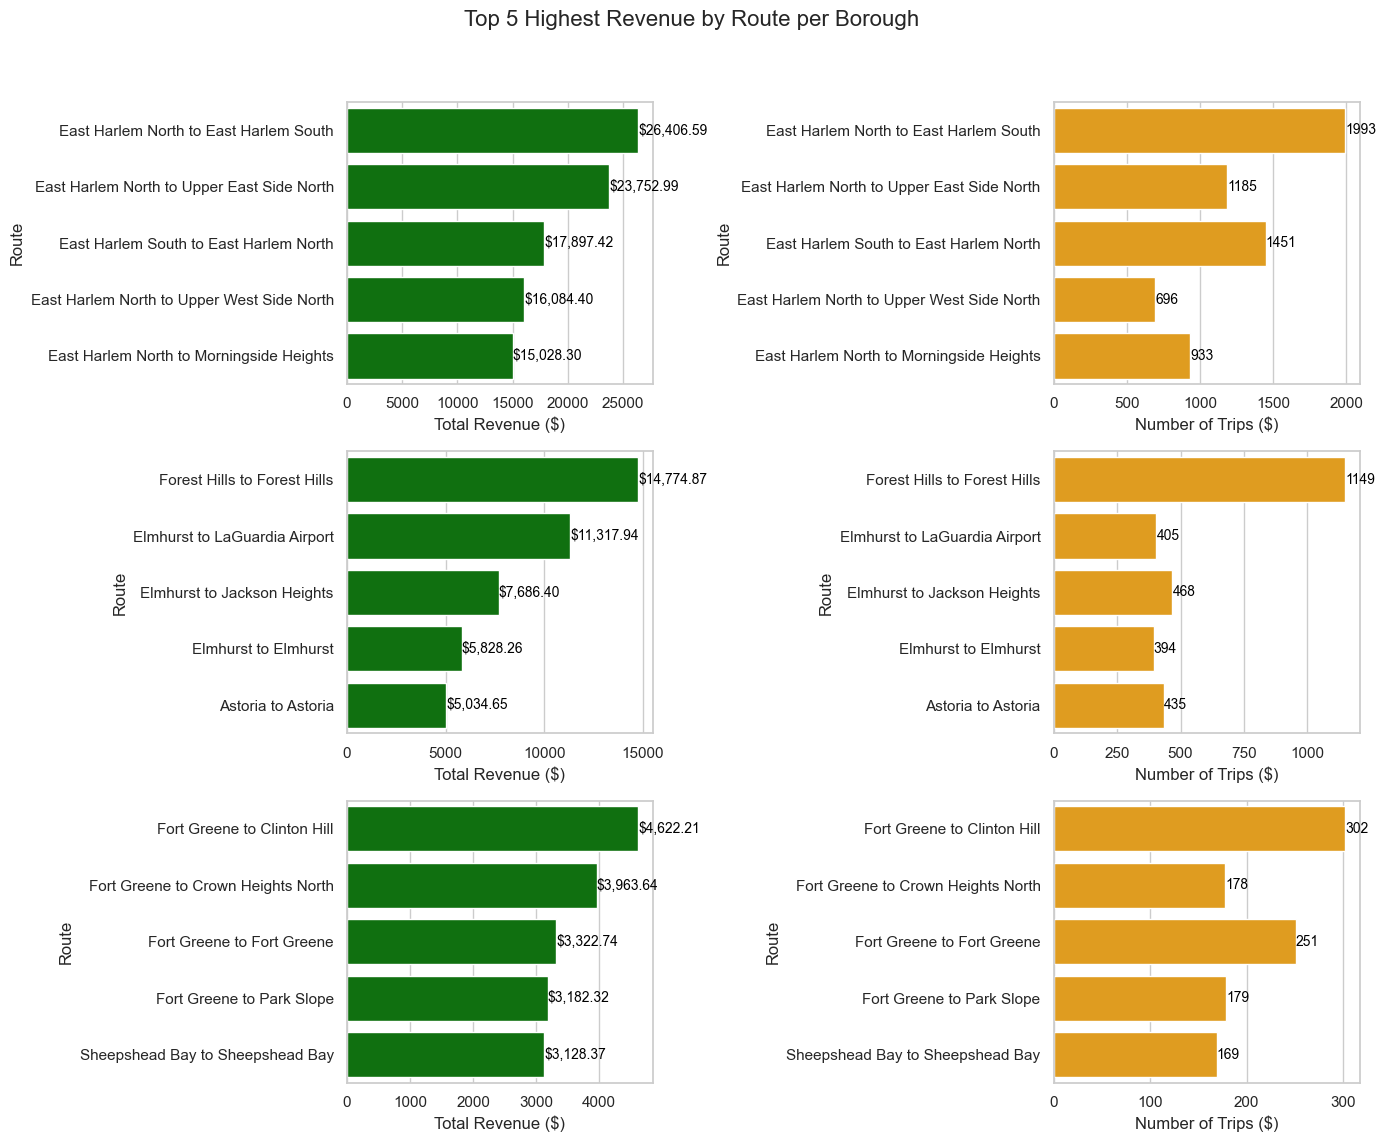

In [117]:
# Set the style for the plots
sns.set(style="whitegrid")

# Create subplots with 3 rows and 2 columns
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
fig.suptitle('Top 5 Highest Revenue by Route per Borough', fontsize=16)

# Define a function to create bar and line charts for each borough
def create_subplot_chart(data, ax, title):
    sns.barplot(x='Total Revenue', y='Route', data=data, ax=ax[0], color='green')
    ax[0].set_xlabel('Total Revenue ($)')
    ax[0].set_ylabel('Route')

    for i, value in enumerate(data['Total Revenue']):
        ax[0].text(value, i, f'${value:,.2f}', ha='left', va='center', fontsize=10, color='black')

    sns.barplot(x='Number of Trips', y='Route', data=data, ax=ax[1], color='orange')  # Change to barplot
    ax[1].set_xlabel('Number of Trips ($)')
    ax[1].set_ylabel('Route')

    for i, value in enumerate(data['Number of Trips']):
        ax[1].text(value, i, f'{value}', ha='left', va='center', fontsize=10, color='black')

# Manhattan subplot
create_subplot_chart(top_route_Manhattan, axes[0], 'Manhattan')

# Queens subplot
create_subplot_chart(top_route_Queens, axes[1], 'Queens')

# Brooklyn subplot
create_subplot_chart(top_route_Brooklyn, axes[2], 'Brooklyn')

# Adjusting layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Display the plot
plt.show()

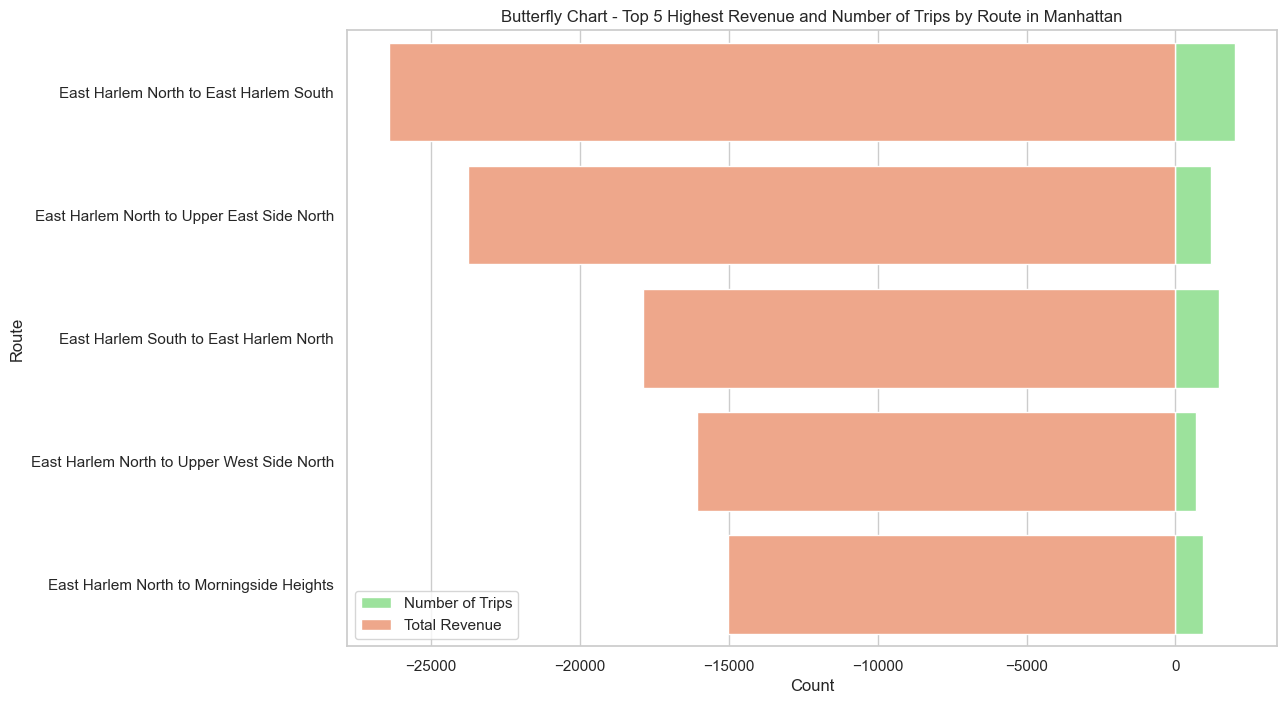

In [118]:
# Set the style for the plots
sns.set(style="whitegrid")

# Create a new figure and axis
fig, ax = plt.subplots(figsize=(12, 8))
plt.title('Butterfly Chart - Top 5 Highest Revenue and Number of Trips by Route in Manhattan')

# Create butterfly chart using barplot
sns.barplot(x=top_route_Manhattan['Number of Trips'], y=top_route_Manhattan['Route'], data=top_route_Manhattan, color='lightgreen', label='Number of Trips')
sns.barplot(x=-top_route_Manhattan['Total Revenue'], y=top_route_Manhattan['Route'], data=top_route_Manhattan, color='lightsalmon', label='Total Revenue')

# Configure Plot
ax.set_xlabel('Count')
ax.set_ylabel('Route')
ax.legend()

# Save Plot with lower dpi
plt.savefig('butterfly_chart_manhattan.png', dpi=100)

# Show Plot
plt.show()

**Insights:**

1. Contributions in **Manhattan Route**:

    - The East Harlem North to East Harlem South route stands out as the top revenue-generating route in Manhattan, generating $26,406 with a total of 1,993 trips. This emphasizes the significance of intra-Manhattan travel along the East Harlem corridor.

    - Key pick-up zones are concentrated in the East Harlem area, showcasing a high demand for taxi services in both the North and South zones.

    - Drop-off zones are primarily within Manhattan, with notable locations including East Harlem, West Side North, and Morning Side Heights, further establishing the importance of internal Manhattan travel.

2. Contributions in **Queens Route**:

    - The Forest Hills to Forest Hills route claims the top spot in Queens, generating the highest revenue of $14,774 with a substantial 1,149 trips. This highlights the economic significance of travel within Queens itself.

    - Primary pick-up zones are identified in Forest Hills, Elmhurst, and Astoria, underscoring the local demand for taxi services within Queens.

    - Drop-off locations remain within Queens, encompassing Forest Hills, LaGuardia Airport, Jackson Heights, Elmhurst, and Astoria, emphasizing the borough's self-contained travel patterns.

3. Contributions in **Brooklyn Route**:

    - The Fort Greene to Clinton Hill route emerges as the top revenue generator in Brooklyn, yielding $4,622 with a total of 302 trips. This showcases the importance of travel within specific neighborhoods in Brooklyn.

    - Key pick-up zones are identified in Fort Greene and Sheepshead Bay, indicating a concentration of travel demand in these areas.

    - Drop-off zones within Brooklyn include Clinton Hill, Crown Heights North, Fort Greene, Park Slope, and Sheepshead, emphasizing the local nature of travel contributing to Brooklyn's overall revenue.

### **3. Customer's Preferences & Factors Influencing Tip Amount**

Developing effective business strategies necessitates the establishment of a robust foundation centered around customers. A profound comprehension of customer behavior is pivotal in cultivating enduring relationships that augment loyalty and enhance overall customer satisfaction. This understanding serves as a cornerstone for devising initiatives aimed at elevating customer comfort and fostering enduring connections.

**What are customer preferences related to payment type and trip type?**

**How does the level of comfort provided influence the amount of tip given?**

**Are there specific aspects of the service that correlate with higher tips?**

#### **The Most Using Payment Type**

In [119]:
payment_type_counts = df['payment_type'].value_counts().sort_values(ascending=False)
payment_type_counts

payment_type
1.0    39524
2.0    21805
5.0     4242
3.0      175
4.0       35
Name: count, dtype: int64

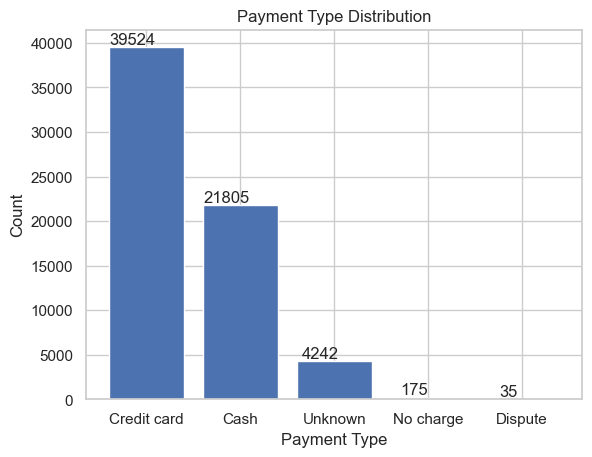

In [120]:
# Mengubah data index
new_index = {1: 'Credit card', 2: 'Cash', 3: 'No charge', 4: 'Dispute', 5: 'Unknown', 6:'Voided trip'}
payment_type_counts = payment_type_counts.rename(index=new_index)

# Membuat bar chart
bars = plt.bar(payment_type_counts.index, payment_type_counts.values)

# Menambahkan label pada setiap batang
for bar, label in zip(bars, payment_type_counts.values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.05, str(label), ha='center', va='bottom')

# Menambahkan judul dan label pada sumbu-sumbu
plt.title('Payment Type Distribution')
plt.xlabel('Payment Type')
plt.ylabel('Count')

# Menampilkan bar chart
plt.show()

**Insights:**

Our analysis reveals a key finding: passengers predominantly make payments using either Credit Cards or Cash. This means that most customers opt for the convenience of electronic transactions through Credit Cards or the traditional method of paying in Cash. Understanding these prevalent payment preferences can help tailor our services to better accommodate the diverse choices of our passengers.

#### **Trip Type Comparison**

In [121]:
trip_type_count = df['trip_type'].value_counts().sort_values(ascending=False)

# Mengubah data index
new_index2 = {1: 'Street-Hail', 2: 'Dispatch'}
trip_type_count = trip_type_count.rename(index=new_index2)

trip_type_count

trip_type
Street-Hail    65104
Dispatch         677
Name: count, dtype: int64

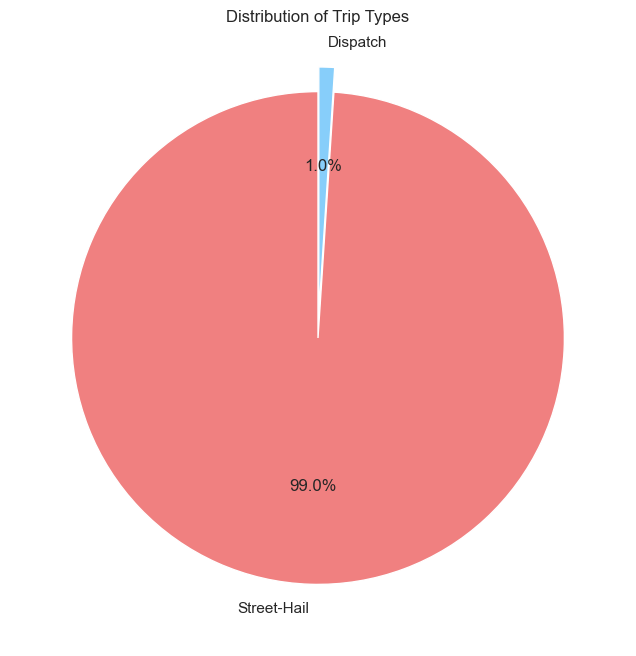

In [122]:
# Membuat pie chart
plt.figure(figsize=(8, 8))
colors = ['lightcoral', 'lightskyblue']
explode = (0, 0.1)  # Memberikan efek 'explode' pada bagian kedua (Dispatch)

# Menambahkan label data
labels = trip_type_count.index

plt.pie(trip_type_count, autopct='%1.1f%%', colors=colors, explode=explode, startangle=90, labels=labels)
plt.title('Distribution of Trip Types')

plt.show()

**Insights:**

Here's something interesting we found: people really like flagging down taxis right on the street instead of calling for one through a dispatcher. If you check, there are way more street-hailed taxis than ones ordered through dispatch. This tells us that customers prefer the quick and easy way of getting a taxi straight from the street instead of waiting for a dispatcher.

#### **Tip Amount by RatecodeID**

In [123]:
tip_ratecode = df[df['tip_amount'] != 0].groupby('RatecodeID').agg(count=('tip_amount', 'count'), med_tip=('tip_amount', 'median')).round(2).reset_index()

# Replacing the appropriate fare_amount value
tip_ratecode.RatecodeID = np.where((tip_ratecode.RatecodeID == 1), 'Standard Rate',\
                            np.where((tip_ratecode.RatecodeID == 2), 'JFK Airport',\
                                np.where((tip_ratecode.RatecodeID == 3), 'Newark Airport',\
                                    np.where((tip_ratecode.RatecodeID == 4), 'Nassau or Westchester ', 
                                             np.where((tip_ratecode.RatecodeID == 5), 'Negotiated Fare', tip_ratecode.RatecodeID)))))

tip_ratecode = tip_ratecode.set_index('RatecodeID').sort_values('med_tip', ascending=False)
tip_ratecode

,count,med_tip
RatecodeID,,
Newark Airport,7,15.94
JFK Airport,83,15.61
Nassau or Westchester,1,5.00
Negotiated Fare,327,4.50
Standard Rate,38237,3.00


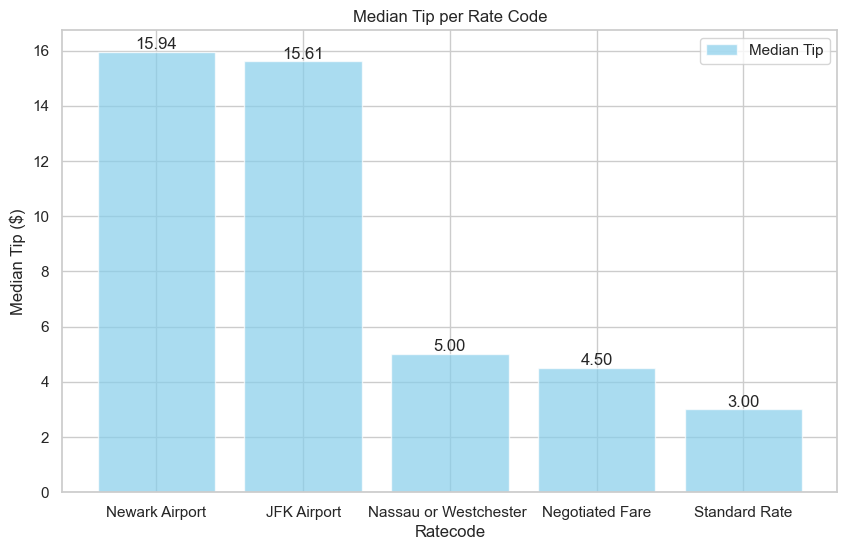

In [124]:
# Creating a bar chart for 'avg_tip'
plt.figure(figsize=(10, 6))
plt.bar(tip_ratecode.index, tip_ratecode['med_tip'], color='skyblue', label='Median Tip', alpha=0.7)

# Adding data labels
for i, txt in enumerate(tip_ratecode['med_tip']):
    plt.annotate(f'{txt:.2f}', (tip_ratecode.index[i], txt), ha='center', va='bottom')

# Adding labels and title
plt.title('Median Tip per Rate Code')
plt.xlabel('Ratecode')
plt.ylabel('Median Tip ($)')
plt.legend()

# Show the bar chart
plt.show()

**Insights:**

Upon reviewing the analysis outcomes, a noticeable trend emerges regarding tipping across various RatecodeIDs. Specifically, we observe that the average tip amount tends to be higher when the pick-up or drop-off location is at the **Airport**, specifically Newark or JFK, as compared to other Ratecodes such as Negotiated, Nassau or Westchester, and Standard Rate. 

This insight indicates a variance in tipping behavior based on the specific RatecodeID, with passengers seemingly more inclined to give higher tips for trips involving airport locations. Understanding these tipping patterns can inform strategies to enhance overall service satisfaction.

#### **Tip Amount by Day**

In [125]:
tip_amountDate = df.groupby(df['lpep_pickup_datetime'].dt.day_name())[['tip_amount']].median().round(2)

# Define the desired order of days of the week
desired_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Reindex the perdate DataFrame based on the desired order
tip_amountDate = tip_amountDate.reindex(desired_order)

tip_amountDate 

,tip_amount
lpep_pickup_datetime,
Sunday,2.00
Monday,1.66
Tuesday,1.66
Wednesday,1.70
Thursday,1.74
Friday,1.50
Saturday,1.74


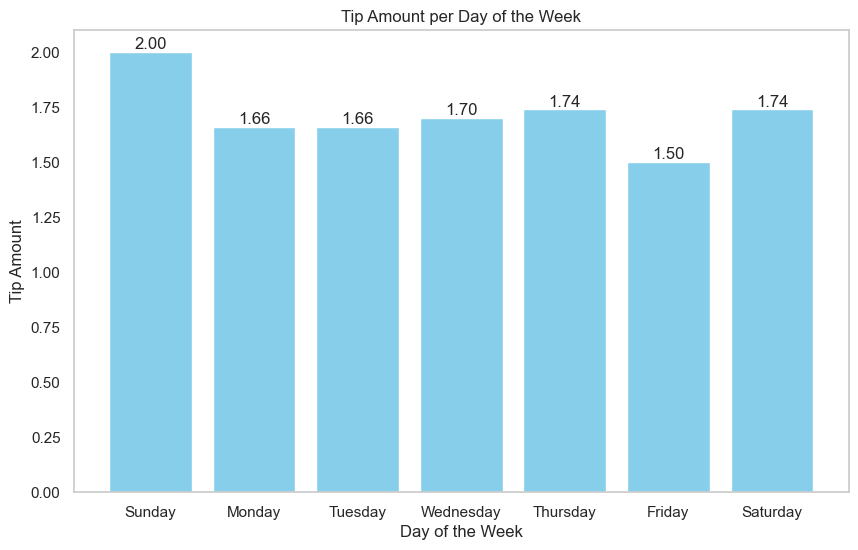

In [126]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(tip_amountDate.index, tip_amountDate['tip_amount'], color='skyblue')

# Adding data labels
for i, value in enumerate(tip_amountDate['tip_amount']):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')

# Adding labels and title
plt.title('Tip Amount per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Tip Amount')

# Remove the grid
plt.grid(False)

# Display the bar chart
plt.show()

**Insights:**

When comparing tipping habits, we find that people tend to give higher tips on weekends compared to weekdays.

This insight suggests a distinct tipping trend influenced by the day of the week, with passengers demonstrating a tendency to be more generous with tips during the weekend. Understanding this variance can guide strategies to optimize service delivery and potentially increase overall tip amounts, especially during peak tipping periods on weekends.

#### **Tip Amount by Hour**

In [127]:
# Extracting the hour and day of the week
df['hour'] = df['lpep_pickup_datetime'].dt.hour
df['day_of_week'] = df['lpep_pickup_datetime'].dt.day_name()

# Filtering weekdays and weekends
weekdays = df[df['day_of_week'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]
weekends = df[df['day_of_week'].isin(['Saturday', 'Sunday'])]

# Grouping by hour and calculating the median tip amount
tip_amount_weekdays = weekdays.groupby('hour')['tip_amount'].median().reset_index()
tip_amount_weekends = weekends.groupby('hour')['tip_amount'].median().reset_index()

display(tip_amount_weekdays)
tip_amount_weekends

,hour,tip_amount
0,0,0.00
1,1,0.00
2,2,0.00
3,3,0.00
4,4,0.00
5,5,0.00
6,6,1.85
7,7,1.98
8,8,1.88
9,9,1.74


,hour,tip_amount
0,0,1.880
1,1,2.080
2,2,2.000
3,3,2.000
4,4,1.990
5,5,0.000
6,6,0.070
7,7,1.000
8,8,1.310
9,9,0.010


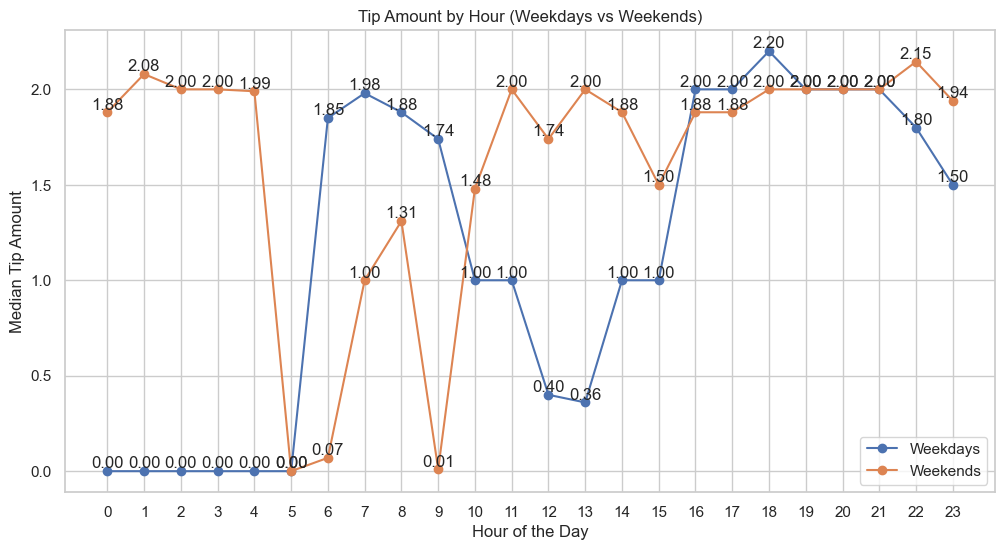

In [128]:
# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(tip_amount_weekdays['hour'], tip_amount_weekdays['tip_amount'], label='Weekdays', marker='o')
plt.plot(tip_amount_weekends['hour'], tip_amount_weekends['tip_amount'], label='Weekends', marker='o')

# Adding data labels to each bar
for i, txt in enumerate(tip_amount_weekdays['tip_amount']):
    plt.annotate(f'{txt:.2f}', (tip_amount_weekdays['hour'][i], txt), ha='center', va='bottom')

for i, txt in enumerate(tip_amount_weekends['tip_amount']):
    plt.annotate(f'{txt:.2f}', (tip_amount_weekends['hour'][i], txt), ha='center', va='bottom')

# Adding labels and title
plt.title('Tip Amount by Hour (Weekdays vs Weekends)')
plt.xlabel('Hour of the Day')
plt.ylabel('Median Tip Amount')
plt.legend()
plt.grid(True)
plt.xticks(tip_amount_weekdays['hour'])

# Show the plot
plt.show()

**Insights:**

Examining tipping patterns reveals distinct timeframes for weekdays and weekends. 

- On weekdays, notable tipping occurs during the morning rush hours from 6 am to 9 am and the evening hours from 4 pm to 9 pm. 

- Meanwhile, on weekends, a consistent trend of tipping is observed from 11 am to 5 am, spanning a broader timeframe throughout the day and night. 

**Assumptions:**

1. **Weekdays** - Morning and Evening Rush Hours (6 am to 9 am, 4 pm to 9 pm):

    - **Business Commutes**: Morning rush hours may involve passengers commuting to work, potentially valuing prompt and courteous service.

    - **Post-Work Hours**: Evening rush hours coincide with the end of the workday, where passengers may appreciate efficient and friendly service as they head home.

2. **Weekends** - Throughout the Day (11 am to 5 am):

    - **Leisure and Entertainment**: Weekends often involve leisure activities, and passengers may be in a more relaxed and generous mood.

    - **Extended Service Hours**: The extended timeframe from 11 am to 5 am covers various activities, including brunch, shopping, and nightlife, potentially leading to more tipping opportunities.

## **Conclusions & Recommendations**

### **Conclusions**

1. Demand Variability:

        - The demand for taxi services exhibits fluctuating patterns, with the highest demand typically occurring in the late afternoon on weekdays, particularly from 3:00 pm to 6:00 pm. 
        
        - The peak demand is concentrated in the borough of Manhattan, followed by Queens and Brooklyn. 
        
        - Key customer-preferred zones, based on high demand, include East Harlem North and South in Manhattan, Forest Hills in Queens, and Fort Greene in Brooklyn.

2. Revenue by Travel Zones and Routes:

        - Revenue contributions vary across different zones and travel routes, with Manhattan leading in total revenue and tipping rates. 
        
        - Significant revenue-contributing zones include East Harlem in Manhattan, Forest Hills in Queens, and Fort Greene in Brooklyn. 
        
        - Customers favor specific routes: East Harlem North to East Harlem in Manhattan, Forest Hills to Forest Hills in Queens, and Fort Greene to Clinton Hill in Brooklyn.

3. Tipping Pattern:

        - Tipping trends vary between weekdays and weekends, with a higher median tip observed during weekends. 
        
        - On weekdays, tipping patterns align with rush hours, whereas during weekends, tipping occurs from noon until the early hours of the morning. 
        
        - Passengers tend to give higher tips for trips involving airport locations. 
        
Understanding these tipping nuances is crucial for taxi service providers to tailor their services, optimize routes, and implement targeted strategies to enhance customer satisfaction and revenue.

### **Recommendations**

1. Taxi Fleet Scheduling
    
    - The taxi fleet distribution is focused on weekdays, from Monday to Friday.
    
    - Additional fleet deployment is prioritized during the evening rush hours (3 pm – 6 pm) on weekdays.
    
    - Additional fleet deployment can also be carried out during the weekend from noon to late night (11 am – 5 am).
    
    - Optimizing taxi operations includes reducing taxi fleet distribution during the late-night hours (12 am – 5 am) on weekdays.

2. Targeting Regions
    
    - Increasing the number of taxis in the Manhattan, Queens, and Brooklyn areas due to high demand for taxi services compared to other regions.
    
    - Concentrating the taxi fleet distribution in:

        - Manhattan (East Harlem North, East Harlem South, Central Harlem, Morningside Heights, Central Park, Washington Heights South)

        - Queens (Forest Hills, Elmhurst, Astoria)

        - Brooklyn (Fort Greene)

    - Distributing the taxi fleet at airports.

    - Conducting further analysis on regions with lower demand (Bronx & Staten Island) in terms of demographics, business, and economics.

3. Payment Types

    - Ensuring the smooth functioning of the credit card payment system.

    - Considering adding other popular digital payment options that are preferred by customers, such as e-wallets or other digital payment applications.

4. Service Quality

    - Providing the best service to customers by educating drivers to drive safely and comfortably. This may encourage customers to give larger tips.

5. Promotion and Partnerships

    - Offering special promotions for routes with the highest demand to attract more customers.
    
    - Providing special promotions during peak hours.

    - Offering exclusive promotions for trips to or from the airport.
    
    - Establishing partnerships with credit card or e-wallet payment providers.

Implementing these recommendations can contribute to achieving the outlined goals of optimizing operational efficiency, enhancing customer satisfaction, and maximizing revenue.
